In [2]:
library(repr) ; options(repr.plot.width=5, repr.plot.height= 5) # Change plot sizes (in cm) - this bit of code is only relevant if you are using a juyter notebook - ignore otherwise

<!--NAVIGATION-->
< [Biological Computing in R](07-R.ipynb)| [Main Contents](Index.ipynb) | [Appendices](Index.ipynb)>

# Data management, exploration and visualization <span class="tocSkip"><a name="chap:Data"></a>
    
>>*Clutter and confusion are failures of design, not attributes of information.* &ndash; Edward Tufte

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#R-vs.-Python" data-toc-modified-id="R-vs.-Python-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>R vs. Python</a></span></li></ul></li><li><span><a href="#Data-wrangling" data-toc-modified-id="Data-wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data wrangling</a></span><ul class="toc-item"><li><span><a href="#Some-data-wrangling-principles" data-toc-modified-id="Some-data-wrangling-principles-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Some data wrangling principles</a></span><ul class="toc-item"><li><span><a href="#Keep-a-metadata-file-for-each-unique-dataset" data-toc-modified-id="Keep-a-metadata-file-for-each-unique-dataset-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Keep a metadata file for each unique dataset</a></span></li><li><span><a href="#Minimize-modifying-raw-data-by-hand" data-toc-modified-id="Minimize-modifying-raw-data-by-hand-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Minimize modifying raw data by hand</a></span></li><li><span><a href="#Convert-wide-format-data-to-long-format-using-scripts" data-toc-modified-id="Convert-wide-format-data-to-long-format-using-scripts-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Convert wide format data to long format using scripts</a></span></li></ul></li><li><span><a href="#On-to-data-exploration" data-toc-modified-id="On-to-data-exploration-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>On to data exploration</a></span></li><li><span><a href="#And-then-came-dplyr-and-tidyr" data-toc-modified-id="And-then-came-dplyr-and-tidyr-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>And then came dplyr and tidyr</a></span></li><li><span><a href="#Practicals" data-toc-modified-id="Practicals-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Practicals</a></span></li><li><span><a href="#Handling-Big-Data-in-R" data-toc-modified-id="Handling-Big-Data-in-R-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Handling Big Data in R</a></span><ul class="toc-item"><li><span><a href="#Databases-and-R" data-toc-modified-id="Databases-and-R-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Databases and R</a></span></li></ul></li></ul></li><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data visualization</a></span><ul class="toc-item"><li><span><a href="#Data-exploration-with-basic-plotting" data-toc-modified-id="Data-exploration-with-basic-plotting-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data exploration with basic plotting</a></span><ul class="toc-item"><li><span><a href="#Basic-plotting-commands" data-toc-modified-id="Basic-plotting-commands-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Basic plotting commands</a></span></li><li><span><a href="#Scatter-Plots" data-toc-modified-id="Scatter-Plots-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Scatter Plots</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Histograms</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.1.3.1"><span class="toc-item-num">3.1.3.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Subplots" data-toc-modified-id="Subplots-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Subplots</a></span></li><li><span><a href="#Overlaying-plots" data-toc-modified-id="Overlaying-plots-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Overlaying plots</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.1.5.1"><span class="toc-item-num">3.1.5.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Boxplots" data-toc-modified-id="Boxplots-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Boxplots</a></span></li><li><span><a href="#Combining-plot-types" data-toc-modified-id="Combining-plot-types-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>Combining plot types</a></span></li><li><span><a href="#Lattice-plots" data-toc-modified-id="Lattice-plots-3.1.8"><span class="toc-item-num">3.1.8&nbsp;&nbsp;</span>Lattice plots</a></span></li><li><span><a href="#Saving-your-graphics" data-toc-modified-id="Saving-your-graphics-3.1.9"><span class="toc-item-num">3.1.9&nbsp;&nbsp;</span>Saving your graphics</a></span></li></ul></li><li><span><a href="#Practicals" data-toc-modified-id="Practicals-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Practicals</a></span></li><li><span><a href="#High-quality-graphics-in-R" data-toc-modified-id="High-quality-graphics-in-R-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>High-quality graphics in R</a></span><ul class="toc-item"><li><span><a href="#Basic-plotting-with-qplot" data-toc-modified-id="Basic-plotting-with-qplot-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Basic plotting with <code>qplot</code></a></span><ul class="toc-item"><li><span><a href="#Scatterplots" data-toc-modified-id="Scatterplots-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Scatterplots</a></span></li><li><span><a href="#Aesthetic-mappings" data-toc-modified-id="Aesthetic-mappings-3.3.1.2"><span class="toc-item-num">3.3.1.2&nbsp;&nbsp;</span>Aesthetic mappings</a></span></li><li><span><a href="#Setting-transparency" data-toc-modified-id="Setting-transparency-3.3.1.3"><span class="toc-item-num">3.3.1.3&nbsp;&nbsp;</span>Setting transparency</a></span></li><li><span><a href="#Adding-smoothers-and-regression-lines" data-toc-modified-id="Adding-smoothers-and-regression-lines-3.3.1.4"><span class="toc-item-num">3.3.1.4&nbsp;&nbsp;</span>Adding smoothers and regression lines</a></span></li><li><span><a href="#Boxplots" data-toc-modified-id="Boxplots-3.3.1.5"><span class="toc-item-num">3.3.1.5&nbsp;&nbsp;</span>Boxplots</a></span></li><li><span><a href="#Histograms-and-density-plots" data-toc-modified-id="Histograms-and-density-plots-3.3.1.6"><span class="toc-item-num">3.3.1.6&nbsp;&nbsp;</span>Histograms and density plots</a></span></li><li><span><a href="#Multi-faceted-plots" data-toc-modified-id="Multi-faceted-plots-3.3.1.7"><span class="toc-item-num">3.3.1.7&nbsp;&nbsp;</span>Multi-faceted plots</a></span></li><li><span><a href="#Logarithmic-axes" data-toc-modified-id="Logarithmic-axes-3.3.1.8"><span class="toc-item-num">3.3.1.8&nbsp;&nbsp;</span>Logarithmic axes</a></span></li><li><span><a href="#Plot-annotations" data-toc-modified-id="Plot-annotations-3.3.1.9"><span class="toc-item-num">3.3.1.9&nbsp;&nbsp;</span>Plot annotations</a></span></li><li><span><a href="#Saving-your-plots" data-toc-modified-id="Saving-your-plots-3.3.1.10"><span class="toc-item-num">3.3.1.10&nbsp;&nbsp;</span>Saving your plots</a></span></li></ul></li><li><span><a href="#Some-more-important-ggplot-options" data-toc-modified-id="Some-more-important-ggplot-options-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Some more important ggplot options</a></span></li><li><span><a href="#Various-geom" data-toc-modified-id="Various-geom-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Various <code>geom</code></a></span></li><li><span><a href="#Advanced-plotting:-ggplot" data-toc-modified-id="Advanced-plotting:-ggplot-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Advanced plotting: <code>ggplot</code></a></span></li><li><span><a href="#Some-useful-ggplot-examples" data-toc-modified-id="Some-useful-ggplot-examples-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Some useful ggplot examples</a></span></li><li><span><a href="#Plotting-a-matrix" data-toc-modified-id="Plotting-a-matrix-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Plotting a matrix</a></span></li><li><span><a href="#Plotting-two-dataframes-(Girko's-circular-Law)" data-toc-modified-id="Plotting-two-dataframes-(Girko's-circular-Law)-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span>Plotting two dataframes (Girko's circular Law)</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.3.7.1"><span class="toc-item-num">3.3.7.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Annotating-plots" data-toc-modified-id="Annotating-plots-3.3.8"><span class="toc-item-num">3.3.8&nbsp;&nbsp;</span>Annotating plots</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.3.8.1"><span class="toc-item-num">3.3.8.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Mathematical-display" data-toc-modified-id="Mathematical-display-3.3.9"><span class="toc-item-num">3.3.9&nbsp;&nbsp;</span>Mathematical display</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.3.9.1"><span class="toc-item-num">3.3.9.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#ggthemes" data-toc-modified-id="ggthemes-3.3.10"><span class="toc-item-num">3.3.10&nbsp;&nbsp;</span>ggthemes</a></span></li></ul></li><li><span><a href="#Practicals" data-toc-modified-id="Practicals-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Practicals</a></span></li><li><span><a href="#Readings-&amp;-Resources" data-toc-modified-id="Readings-&amp;-Resources-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Readings &amp; Resources</a></span></li></ul></li></ul></div>

# Introduction

This chapter aims at introducing you to key principles and methods for data processing, storage, exploration and visualization. 

In this modern world, massive amounts of data are being generated in biology due to rapid advances in technologies for collecting new, as well as for digitizing old data. Some prominent examples are *Genomics*, *Climatic*, and *Animal tracking* data. Ultimately the goal of quantitative biology is to both, discover new patterns in these data, and fit new mathematical models to them. Reproducible data manipulation, analyses and visualization are particularly necessary when data are so large and complex, and few are more so than Biological data, which are extremely heterogeneous in their structure and quality.  Furthermore, when these data are "big" (see [section below](#Handling-Big-Data-in-R) on what makes a dataset "big"), computationally-efficient data handling, manipulation and analysis techniques are needed. 

## R vs. Python

We will use R in this chapter because it a great one stop solution for both data manipulation, analysis and visualization. If you are keen on trying data analyses in Python, see [this Appendix](Appendix-Data-Python.ipynb). In general, R will do the job for most of your purposes. The main advantages that Python has is its greater computational efficiency&mdash;R was developed for convenient statistical analyses with efficiency was not being the main concern. Read more about R vs Python for data analytics [here](https://www.kdnuggets.com/2015/05/r-vs-python-data-science.html) and [here](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1523009719/main-qimg-9dcf536c501455f073dfbc4e09798a51_vpijr0.png). 

# Data wrangling

You are likely to spend far more time than you think dredging through data files manually, checking them, editing them, and reformatting them to make them useful for data exploration and statistical  analysis. It is often the case that you'll have to deal with messy or incomplete data, either because of sampling challenges (e.g., if you are a field ecologist), or because you got given data that was poorly recorded and maintained. The data we obtain from different data sources is often unusable at the beginning; for example you may need to:  
* Identify the variables vs observations within the data&mdash;somebody else might have recorded the data, or you might have  collected the data some time back!
* Fill in zeros (true measured/observed absences) 
* Identify and add a value (e.g., `-999999`) to denote missing observations	
* Derive or calculate new variables from the raw observations (e.g., convert measurements to SI units; kilograms, meters, seconds, etc.)
* Reshape/reformat your data into a layout that works best for analysis (e.g., for R itself)&mdash;e.g., from wide to long data  format for repeated (across sites, plots, plates, chambers, etc) measures data
* Merge multiple datasets together into a single data sheet

And this is not an exhaustive list. Doing so many different things to your raw data is both time-consuming and risky. Why risky? Because  to err is very human, and every new, tired mouse-click and/or keyboard-stab has a high probability of inducing an erroneous data point!

*An illustration of a (metaphorical) datum being wrangled into submission:*
![An illustration of a (metaphorical) datum being wrangled into submission.](./graphics/Wrangling2.jpg)

## Some data wrangling principles

So you would like a record of the data wrangling process (so that it  is repeatable and even reversible), and automate it to the extent  possible. To this end, here are some guidelines:

* Store data in universally (machine)-readable, non-proprietary formats; basically, use plain ASCII text for your file names, variable/field/column names, and data values. And make sure the data file's "text encoding" is correct and standard  (e.g., `UTF-8`). 

* Keep a metadata file for each unique dataset (again, in  non-proprietary format).

* Minimize modifying raw data by hand&mdash;use scripts  instead&mdash;keep a copy of the data as they were recorded.

* Use meaningful names for your data and files and field (column) names

* When you add data, try not to add columns (widening the format); rather, design your tables/data-sheets so that you add only rows (lengthening the format)&mdash;and convert "wide format data" to "long format data" using  scripts, not by hand,

* All cells within a data column should contain only one type of information (i.e., either text (character), numeric, etc.). 

* Ultimately, consider creating a relational database for your  data (see [below](#Databases-and-R)).

This is not an exhaustive list either&mdash; read the [Borer et al (2009) paper](#Readings-&-Resources).

We will use the Pound Hill dataset collected by students in a past Silwood Field Course for understanding some of these  principles. 

To start with, we need to import the *raw* data file, for which, follow these steps:

* Copy the file `PoundHillData.csv` and `PoundHillMetaData.csv` files from TheMulQuaBio's `data` directory into your own R week's `data` directory. 
* Then load the data in R: 

In [3]:
MyData <- as.matrix(read.csv("../data/PoundHillData.csv",header = F,  stringsAsFactors = F))
MyMetaData <- read.csv("../data/PoundHillMetaData.csv",header = T,  sep=";", stringsAsFactors = F)

In [4]:
class(MyData)

[1] "matrix"

Note that:

* Loading the data `as.matrix()`, and setting the `header` and `stringsAsFactors` guarantees that the data are imported "as is" so that you can wrangle them. Otherwise `read.csv` will convert the first row to column headers, convert everything to `factor`s (look back at the [R Chapter](07-R.ipynb) for this if you need to), etc. 
* All the data will be converted to the character class in the resulting matrix called `MyData` because at least one of the entries is already character class.
* For loading the the metadata, 
    * the `header` is set to true because we do have metadata headers (`FieldName` and`Description`), and 
    * I have used semicolon (`;`) as delimiter because there are commas in one of the field descriptions.
* I have avoided spaces in the columns headers (so "FieldName" instead of "Field Name") — please avoid spaces in field or column names because R will replace each space in a column header with a dot, which may be confusing.

>**The text encoding of your data file:** If you have a string, in memory (e.g., a named variable in your R workspace) or in a file the computer has to know what encoding it is in or it cannot interpret or display it to you correctly. Usually, the encoding will be UTF-8 or ASCII, which is easily handled by most computer languages. Sometimes you may run into (unexpected) bugs when importing and running scripts in `R` because your file has a non-standard text encoding. You will need to specify the encoding in that case, using the `encoding` argument of `read.csv()` and `read.table()`. You can check the encoding of a file by using `find` in Linux/Mac. Try in your UNIX terminal: 
```bash
file -i ../data/PoundHillData.csv
``` 
or, check encoding of all files in the `Data` directory: 
```bash
file -i ../data/*.csv
```  
Use `file -I` instead of `file -i` in a Mac terminal.

> **Boolean arguments in R**: In `R`, you can use `F` and `T` for boolean `FALSE` and `TRUE` respectively. To see this, type 
```rscript 
a <- T``` 
in the R commandline, and then see what R returns when you type `a`

Now check out what the data look like:

In [5]:
head(MyData)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
Cultivation,october,october,october,october,october,may,may,may,may,⋯,march,march,may,may,may,october,october,october,october,october
Block,a,a,a,a,a,a,a,a,a,⋯,d,d,d,d,d,d,d,d,d,d
Plot,1,1,1,1,1,2,2,2,2,⋯,10,10,12,12,12,11,11,11,11,11
Quadrat,Q1,Q2,Q3,Q4,Q5,Q1,Q2,Q3,Q4,⋯,Q5,Q6,Q1,Q2,Q4,Q1,Q2,Q3,Q4,Q5
Achillea millefolium,4,8,3,20,6,4,,,,⋯,4,10,,,,,,12,6,5
Agrostis gigantea,,,,,15,,,,,⋯,19,80,33,145,45,62,25,57,113,12


Note that column names V1-V60 were generated automatically by R when you imported the data

In RStudio you can also do `view(MyData)` at the R prompt or any other code editor, `fix(MyData)`. We won't do anything with the metadata file in this session except inspect the information it contains. 

Now let's implement some of the key data wrangling principles listed above on this dataset. You should keep a record of what you are doing to the data using a R script file. This is illustrated in the `DataWrang.R` script file.

$\star$ copy the script `DataWrang.R` into your own R training directory's `code` directory and open it. 

Go through the script carefully line by line, and make sure you understand what's going on. Read the comments — add to them if you want. 

OK, so onward with our data wrangling.

### Keep a metadata file for each unique dataset

Data wrangling really begins immediately after data collection. You may collect data of different kinds (e.g., diversity, biomass, tree girth), etc. Keep the original spreadsheet well documented using a "metadata" file that describes the data (you would hopefully have written the first version of this even before you started collecting the data!). The minimum information needed to make a metadata file useful is a description of each of the *fields* — the column or row headers under which the information is stored in your data/spreadsheet.

Have a look at the metadata file for the Pound Hill dataset:

In [6]:
MyMetaData

FieldName,Description
Cultivation,"Cultivation treatments applied in three months: october, may, march"
Block,Treatment blocks ids: a-d
Plot,Plot ids under each treatment : 1-12
Quadrat,Sampling quadrats (25x50 cm each) per plot: Q1--Q6
SpeciesCount,Number of individuals of species (count) per quadrat


Ideally, you would also like to add more information about the data, such as the measurement units of each type of observation. These data include just one type of observation: Number of individuals of species per sample (plot), which is a count (integer, or `int` data class).

### Minimize modifying raw data by hand

When the dataset is large (e.g., 1000's of rows), cleaning and exploring it can get tricky, and you are very likely to make many mistakes. You should record all the steps you used to process it with an R script rather than risking a manual and basically *irreproducible* processing. Most importantly, *avoid or minimize editing your raw data
file*&mdash;make a copy (with a meaningful tag in the file name to indicate the date and author) before making hand edits.

All blank cells in the data are *true absences*, in the sense that species was actually not present in that quadrat. So we can replace those blanks with zeros:  

In [7]:
MyData[MyData == ""] = 0

### Convert wide format data to long format using scripts

One typically records data in the field or experiments using a "wide" format, where a subject's (e.g., habitat, plot, treatment, species etc) repeated responses or observations (e.g., species count, biomass, etc) will be in a single row, and each response in a separate column. The raw Pound Hill data were recorded in this way. However, the wide format is not ideal for data analysis — instead you need the data in a "long" format, where each row is one observation point per subject. So each subject will have data in multiple rows. Any measures/variables/observations that don't change across the subjects will have the same value in all the rows. For humans, the wide format is generally more intuitive for recording (e.g., in field data sheets) data. However, for data inspection and analysis, the long format is preferable for two main reasons: 

* If you have many response and/or treatment variables, it is hard to inspect the data values in a wide-form version of the dataset. In the case of the pound hill dataset, the response variable is species, and treatment variable is cultivation month (with sequentially nested replicates&mdash;block, plot, quadrat&mdash; within it), and the data values are the number (count) of individuals of each species per quadrat. As you can see, there are a a large number of columns (60 to be exact), with columns V2-V60 containing different treatment combinations. This makes it hard to visually see problems with the data values. You would have to look across all these columns to see any issues, or if you wanted to run a single command on all the data values (e.g., `is.integer()` to check if they are all integers, as you would expect), it would be harder to do so or interpret the output if all the species counts were in a single column.

* Long-form datasets are typically required for statistical analysis and visualization packages or commands in R (or Python, for that matter). For example, if you wanted to fit a linear model usimg R's `lm()` command, with treatment (cultivation month) as the independent variable, you would need to structure your data in long form. Similarly, and if you wanted to plot histograms of species numbers by treatment using ggplot (coming up), you would also need these data in long format.

*OK, so let's go from wide to long format already!*

You can switch between wide and long formats using `melt()` and `dcast()` from the `reshape2` package, as illustrated in `DataWrang.R`. But first, let's transpose the data, because for a long format, the (nested) treatments variables should be in rows:

In [8]:
MyData <- t(MyData) 
head(MyData)

V1,Cultivation,Block,Plot,Quadrat,Achillea millefolium,Agrostis gigantea,Anagallis arvensis,Anchusa arvensis,Anisantha sterilis,Aphanes australis,⋯,Semecio jacobaea,Sonchus asper,Spergula arvensis,Stellaria graminea,Taraxacum officinale,Tripleurospermum inodorum,Veronica arvensis,Veronica persica,Viola arvensis,Vulpia myuros
V2,october,a,1,Q1,4,0,0,0,0,0,⋯,0,0,0,8,0,11,0,1,0,0
V3,october,a,1,Q2,8,0,0,3,0,0,⋯,0,0,0,4,0,1,0,0,3,0
V4,october,a,1,Q3,3,0,0,1,0,0,⋯,0,0,0,1,0,0,0,0,1,0
V5,october,a,1,Q4,20,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,1,0
V6,october,a,1,Q5,6,15,0,0,5,0,⋯,0,0,0,1,10,0,0,0,0,7


At this point, you should note that the first row in the data `matrix` actually contains the column headers, but these are not encoded by R as being column headers. As far as R is concerned, the first row is just another data row. You can check this:

In [9]:
colnames(MyData)

NULL

We need to fix this. Also, we would like to create a dataframe now, as this is needed by the R commands we will be using, and ultimately, any visualization and analysis we will be doing. To this end, let's first create a temporary dataframe with just the data, without the column names:

In [10]:
TempData <- as.data.frame(MyData[-1,],stringsAsFactors = F)
head(TempData)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45
V2,october,a,1,Q1,4,0,0,0,0,0,⋯,0,0,0,8,0,11,0,1,0,0
V3,october,a,1,Q2,8,0,0,3,0,0,⋯,0,0,0,4,0,1,0,0,3,0
V4,october,a,1,Q3,3,0,0,1,0,0,⋯,0,0,0,1,0,0,0,0,1,0
V5,october,a,1,Q4,20,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,1,0
V6,october,a,1,Q5,6,15,0,0,5,0,⋯,0,0,0,1,10,0,0,0,0,7
V7,may,a,2,Q1,4,0,0,1,0,0,⋯,0,0,2,0,0,0,0,2,0,0


Note that `stringsAsFactors = F` is important here because we don't want R to convert columns to the factor class without supervision. This might be a good idea in may cases, but let's just do it manually later. This will also force you to think carefully about what data each of you columns contains. 

Now let's assign the original column names to the temporary dataset: 

In [11]:
colnames(TempData) <- MyData[1,] # assign column names from original data
head(TempData)

,Cultivation,Block,Plot,Quadrat,Achillea millefolium,Agrostis gigantea,Anagallis arvensis,Anchusa arvensis,Anisantha sterilis,Aphanes australis,⋯,Semecio jacobaea,Sonchus asper,Spergula arvensis,Stellaria graminea,Taraxacum officinale,Tripleurospermum inodorum,Veronica arvensis,Veronica persica,Viola arvensis,Vulpia myuros
V2,october,a,1,Q1,4,0,0,0,0,0,⋯,0,0,0,8,0,11,0,1,0,0
V3,october,a,1,Q2,8,0,0,3,0,0,⋯,0,0,0,4,0,1,0,0,3,0
V4,october,a,1,Q3,3,0,0,1,0,0,⋯,0,0,0,1,0,0,0,0,1,0
V5,october,a,1,Q4,20,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,1,0
V6,october,a,1,Q5,6,15,0,0,5,0,⋯,0,0,0,1,10,0,0,0,0,7
V7,may,a,2,Q1,4,0,0,1,0,0,⋯,0,0,2,0,0,0,0,2,0,0


The row names still remain, but they are not really bothering us, so we can ignore them. But if you do want to get rid of them, you can:

In [12]:
rownames(TempData) <- NULL
head(TempData)

Cultivation,Block,Plot,Quadrat,Achillea millefolium,Agrostis gigantea,Anagallis arvensis,Anchusa arvensis,Anisantha sterilis,Aphanes australis,⋯,Semecio jacobaea,Sonchus asper,Spergula arvensis,Stellaria graminea,Taraxacum officinale,Tripleurospermum inodorum,Veronica arvensis,Veronica persica,Viola arvensis,Vulpia myuros
october,a,1,Q1,4,0,0,0,0,0,⋯,0,0,0,8,0,11,0,1,0,0
october,a,1,Q2,8,0,0,3,0,0,⋯,0,0,0,4,0,1,0,0,3,0
october,a,1,Q3,3,0,0,1,0,0,⋯,0,0,0,1,0,0,0,0,1,0
october,a,1,Q4,20,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,1,0
october,a,1,Q5,6,15,0,0,5,0,⋯,0,0,0,1,10,0,0,0,0,7
may,a,2,Q1,4,0,0,1,0,0,⋯,0,0,2,0,0,0,0,2,0,0


Finally, let's convert the data to long format. For this, we need the `reshape2` package.

In [13]:
require(reshape2) # load the reshape2 package

Loading required package: reshape2


Check out the help for the `melt` command of `reshape2`: `?melt`. 

And finally, let's wrangle this dataset into submission!

In [14]:
MyWrangledData <- melt(TempData, id=c("Cultivation", "Block", "Plot", "Quadrat"), variable.name = "Species", value.name = "Count")
head(MyWrangledData); tail(MyWrangledData)

Cultivation,Block,Plot,Quadrat,Species,Count
october,a,1,Q1,Achillea millefolium,4
october,a,1,Q2,Achillea millefolium,8
october,a,1,Q3,Achillea millefolium,3
october,a,1,Q4,Achillea millefolium,20
october,a,1,Q5,Achillea millefolium,6
may,a,2,Q1,Achillea millefolium,4


,Cultivation,Block,Plot,Quadrat,Species,Count
2414,may,d,12,Q4,Vulpia myuros,0
2415,october,d,11,Q1,Vulpia myuros,0
2416,october,d,11,Q2,Vulpia myuros,0
2417,october,d,11,Q3,Vulpia myuros,0
2418,october,d,11,Q4,Vulpia myuros,0
2419,october,d,11,Q5,Vulpia myuros,0


This is the long format we have been extolling! It looks much simpler, with all the count data in a single, long column with each count value associated with some "attributes". It is now clear that the fundamental unit of analysis is a species' count in a quadrat, each nested within a plot, each in turn nested within a block, and finally, each of which is nested within a cultivation month (the main treatment). 

We can also now assign the correct data types to each column:  

In [15]:
MyWrangledData[, "Cultivation"] <- as.factor(MyWrangledData[, "Cultivation"])
MyWrangledData[, "Block"] <- as.factor(MyWrangledData[, "Block"])
MyWrangledData[, "Plot"] <- as.factor(MyWrangledData[, "Plot"])
MyWrangledData[, "Quadrat"] <- as.factor(MyWrangledData[, "Quadrat"])
MyWrangledData[, "Count"] <- as.integer(MyWrangledData[, "Count"])
str(MyWrangledData)

'data.frame':	2419 obs. of  6 variables:
 $ Cultivation: Factor w/ 3 levels "march","may",..: 3 3 3 3 3 2 2 2 2 2 ...
 $ Block      : Factor w/ 4 levels "a","b","c","d": 1 1 1 1 1 1 1 1 1 1 ...
 $ Plot       : Factor w/ 12 levels "1","10","11",..: 1 1 1 1 1 5 5 5 5 5 ...
 $ Quadrat    : Factor w/ 6 levels "Q1","Q2","Q3",..: 1 2 3 4 5 1 2 3 4 5 ...
 $ Species    : Factor w/ 41 levels "Achillea millefolium",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Count      : int  4 8 3 20 6 4 0 0 0 0 ...


## On to data exploration

Once you have wrangled the Pound Hill data to its long format, you are ready to go! You may want to start by examining and visualizing the basic properties of the data, such as the number of tree species (41) in the dataset, number of quadrats (replicates) per plot and cultivation treatment, etc.

We will learn about visualization next. After that, you can return to this dataset and try out some visual data exploration. For example, a useful visualization would be to make a histogram of abundances of species, grouped by different factors. For example, you can look at distributions of species' abundances grouped by the fundamental treatment, `Cultivation`. 

## And then came dplyr and tidyr

So if you think this is the end of the options you have for data wrangling in R, think again. There are new kids on the block: `dplyr` — the next iteration of `plyr` that addresses the speed issues in the latter, and `tidyr`,
essentially a nicer wrapper to the ` reshape2` package with additional functions.

You will have to install these packages using `sudo apt get install` in Linux or `install.packages()` across all
platforms (recall the [R Chapter](07-R.ipynb)).

Together, these two packages have many many useful functions. Let's have a quick look at `dplyr`:

In [16]:
require(dplyr)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Then try these commands:

`dplyr::tbl_df(MyWrangledData) #like head(), but nicer!`

In [17]:
dplyr::glimpse(MyWrangledData) #like str(), but nicer!

Observations: 2,419
Variables: 6
$ Cultivation <fct> october, october, october, october, october, may, may, ma…
$ Block       <fct> a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, b, b, b, …
$ Plot        <fct> 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, …
$ Quadrat     <fct> Q1, Q2, Q3, Q4, Q5, Q1, Q2, Q3, Q4, Q5, Q1, Q2, Q3, Q4, Q…
$ Species     <fct> Achillea millefolium, Achillea millefolium, Achillea mill…
$ Count       <int> 4, 8, 3, 20, 6, 4, 0, 0, 0, 0, 1, 2, 5, 12, 2, 0, 0, 0, 0…


Or this:

`utils::View(MyWrangledData) #same as fix()`

In [18]:
dplyr::filter(MyWrangledData, Count > 100) #like subset(), but nicer!

Cultivation,Block,Plot,Quadrat,Species,Count
october,b,6,Q1,Agrostis gigantea,143
october,c,8,Q1,Agrostis gigantea,198
october,c,8,Q5,Agrostis gigantea,351
march,d,10,Q1,Agrostis gigantea,259
march,d,10,Q4,Agrostis gigantea,291
may,d,12,Q2,Agrostis gigantea,145
october,d,11,Q4,Agrostis gigantea,113
may,c,9,Q2,Anisantha sterilis,120
october,a,1,Q1,Holcus mollis,159
october,a,1,Q3,Holcus mollis,144


In [19]:
dplyr::slice(MyWrangledData, 10:15) # Look at an arbitrary set of data rows

Cultivation,Block,Plot,Quadrat,Species,Count
may,a,2,Q5,Achillea millefolium,0
march,a,3,Q1,Achillea millefolium,1
march,a,3,Q2,Achillea millefolium,2
march,a,3,Q3,Achillea millefolium,5
march,a,3,Q4,Achillea millefolium,12
march,a,3,Q5,Achillea millefolium,2


Note that the double colon (`::`) notation of `dplyr` and ` tidyr` is like the dot notation in Python — it allows you to access a particular function (like a Python module) from these packages. So, for instance, if you want to use `tbl_df()` from `dplyr`, the command syntax would be `dplyr::tbl_df(MyData)`. 

This new syntax is basically to avoid conflict in names of functions in by these new packages with the function names that already exist in the base R packages. For example,the `dplyr` function `filter` already exists in the base R package `stats`. Thus, when you first load `dplyr`, you will get:

In [20]:
library(dplyr)

```bash 
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union
```

Learning to use `ddply` and `tidyr` involves learning some new syntax and a lot of new commands, but if you plan to
do a lot of data wrangling, you may want to get to know them well. Have a look at [this website](https://blog.rstudio.org/2014/01/17/introducing-dplyr) and this [cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf),
also available in the `readings` directory under `DataDataData!` in the TheMulQuaBio repository.

## Practicals

1. We used `reshape2` in `DataWrang.R` for wrangling that dataset. Write a new script called `DataWrangTidy.R` that uses `dplyr` and `tidyr` for the same data wrangling steps. The best way to do this is to copy `DataWrang.R` and rename it `DataWrangTidy.R`. Then systematically redo the script from start to end, looking for a function in `dplyr` and ` tidyr` that does the same thing in each wrangling step.

For example, to convert from wide to long format, instead of using ` melt()` (or `dcast()`) from the `reshape2` package, you can use `gather()` from `tidyr`.

Don't forget the [cheatsheet](
https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf) 
(also available in the `readings` directory under `DataDataData!` in the TheMulQuaBio repository).

## Handling Big Data in R

The buzzword 'Big Data' basically refers to datasets that have the following properties:

1.  A dataset that does not fit into available RAM on one system (say, >2 gigabytes).

2.  A dataset that has so many rows (when in it's long format — see above sections) that it significantly slows down your analysis or simulation without vectorization (that is, when looping).

Both these criteria are programming language-, and computer hardware-dependent, of course. For example, a 32-bit OS can only handle ~2 GB of RAM, so this computer will struggle every time you try to handle a dataset in that size range.

R reads data into RAM all at once when you using the `read.table` (or its wrapper, `read.csv()` — maybe
you have realized by now that `read.csv()` is basically calling `read.table()` with a particular set of options. That is, objects in R live in memory entirely, and big-ish data in RAM will cause R to choke. Python has similar problems, but you can circumvent these to an extent by using `numpy` arrays (see the [second Python Chapter](06-Python_II.ipynb)).

There are a few options (which you can combine, of course) if you are actually using datasets that are so large:

* Import large files smartly; e.g., using `scan()` in R, and then create subsets of the data that you need. Also, use the `reshape` or `tidyr` packages to covert your data in the most "square" (so neither too long or too wide) format as possible. Of course, you will need subsets of data in long format for analysis (see sections above).

* Use the `bigmemory` package to load data in the gb range (e.g., use `read.big.matrix()` instead of `read.table()`. This package also has other useful functions, such as `foreach()` instead of `for()` for better memory management.

* Use a 64 bit version of R with enough memory and preferably on Linux!

* Vectorize your analyses/simulations to the extent possible (See Python and R chapters).

* Use databases (more on this below).

* Use distributed computing (distribute the analysis/simulation across multiple CPU's).

The next subsection superficially covers databases. We will cover memory management in the advanced Python, HPC and C weeks.

### Databases and R

R can be used to link to and extract data from online databases such as PubMed and GenBank, or to manipulate and access your own. Computational Biology datasets are often quite large, and it makes sense to access their data by querying the databases instead of manually downloading them. So also, your own data may be complex and large, in which case you may want to organize and manage those data in a proper relational database.

Practically all the data wrangling principles in the previous sections are a part and parcel of relational databases.

There are many R packages that provide an interface to databases (SQLite, MySQL, Oracle, etc). Check out R packages [DBI](http://cran.r-project.org/web/packages/DBI/index.html) and [RMySQL](https://cran.r-project.org/web/packages/RMySQL/index.html] .

R can also also be used to access, update and manage databases. In particular `SQLite` allows you to build, manipulate, and access databases easily. Try the script called `SQLinR.R` available in the `code` directory of TheMUlQuaBio. You will learn more about databases  in the [second Python Chapter](06-Python_II.ipynb).

# Data visualization 

Now that you have learned how to wrangle data, let's learn some key principles of graphics and visualization, and how to implement them in R. You can use R to build a complete, reproducible workflow for data visualization for both  exploratory and publication purposes. We will start with some basic plotting and data exploration. You will then learn to generate publication-quality visualizations using the `ggplot2` package. 

## Data exploration with basic plotting

Before you do any statistical analyses with data, you must clean, explore, and visualize it. And eventually, you want to produce a finished product that presents visualizations of your data and your results clearly and concisely. 

Ultimately, at both, the data exploration and the finished product stages, the goal of graphics is to present information such that it provides intuitive ideas. As Edward Tufte says:
> *"Graphical excellence is that which gives to the viewer the greatest number of ideas in the shortest time with the least ink in the smallest space."*

R can produce beautiful graphics without the time-consuming and fiddly methods that you might have used in Excel or equivalent. You should also make it a habit to quickly plot the data for exploratory analysis. So we are going to learn some basic plotting first.

### Basic plotting commands

Here is a menu of basic R plotting commands (use `?commandname` to learn more about it):

|  Command  | What it does |
|:-|:-|
|`plot(x,y)`|        Scatterplot|
|`plot(y~x)`|       Scatterplot with `y` as a response variable|
|  `hist(mydata)`|     Histogram|
|`barplot(mydata)`|      Bar plot|
|`points(y1$\sim$x1)`|   Add another series of points|
|  `boxplot(y$\sim$x)`|    Boxplot|

>**R graphics devices**: In all that follows, you may often end up plotting multiple plots on the same graphics window without intending to do so, because R by default keeps plotting in the most recent plotting window that was opened. You can close a particular graphics window or "device" by using `dev.off()`, and all open devices/windows with `graphics.off()`. By default, `dev.off()` will close the most recent figure device that was opened.
>
>Note that there are invisible devices as well! For example, if you are printing to pdf (coming up below), the device or graphics window will not be visible on your computer screen.

Now let's try some simple plotting for data exploration. As a case study, we will use a dataset on Consumer-Resource (e.g., Predator-Prey) body mass ratios taken from the Ecological Archives of the ESA (Barnes *et al.* 2008, Ecology 89:881).

$\star$ Copy `EcolArchives-E089-51-D1.csv` from the TheMulQuaBio `data` to your own data directory. Then, launch R and read in these data to a data frame (note the relative path):

In [21]:
MyDF <- read.csv("../data/EcolArchives-E089-51-D1.csv")
dim(MyDF) #check the size of the data frame you loaded

[1] 34931    15

Let's look at what the data contain. Type `MyDF` and hit the TAB key twice in the R commandline. 

>**Remember Tabbing**: In your smart code editor or IDE such as vscode or RStudio, you will see a drop-down list of all the column headers in a dataframe when you hit TAB once after `MyDF$`

You can also use the `str()` and `head()` commands.

As you can see, these data contain predator-prey body size information. This is an interesting dataset because it is huge, and covers a wide range of body sizes of aquatic species involved in consumer-resource interactions — from unicells to whales. Analyzing this dataset should tell us a lot about what sizes of prey predators like to eat.

<img src="./graphics/SeaLion.png" alt="A consumer-resource (predator-prey) interaction waiting to happen" style="width: 500px;"/>

### Scatter Plots

Let's start by plotting Predator mass vs. Prey mass. 

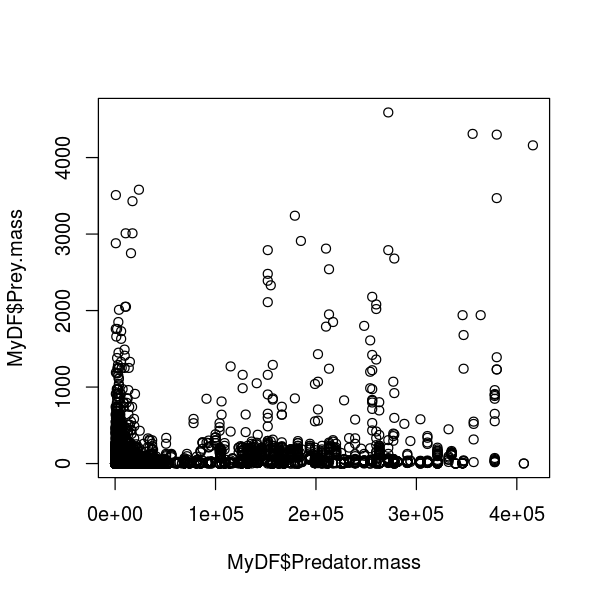

In [22]:
plot(MyDF$Predator.mass,MyDF$Prey.mass)

That doesn't look very meaningful! Let's try taking logarithms. *Why?* - Because body sizes across species tend to be log-normally distributed, with a lot of small species and a few large ones. Taking a log allows you to inspect the body size range in a meaningful (logarithmic) scale and reveals the true relationship. This also illustrates a important point. Just like statistical analyses, the effectiveness of data visualization too depends on the type of distribution of the data.

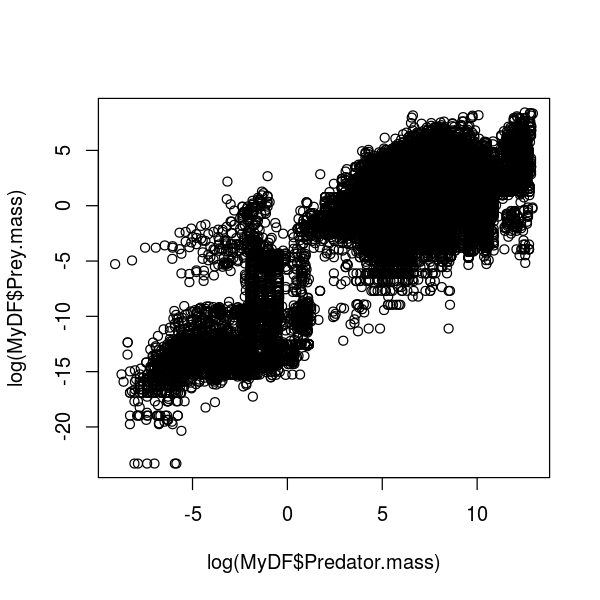

In [23]:
plot(log(MyDF$Predator.mass),log(MyDF$Prey.mass))

We can change almost any aspect of the resulting graph; let's change the
symbols by specifying the `p`lot `ch`aracters
using `pch`:

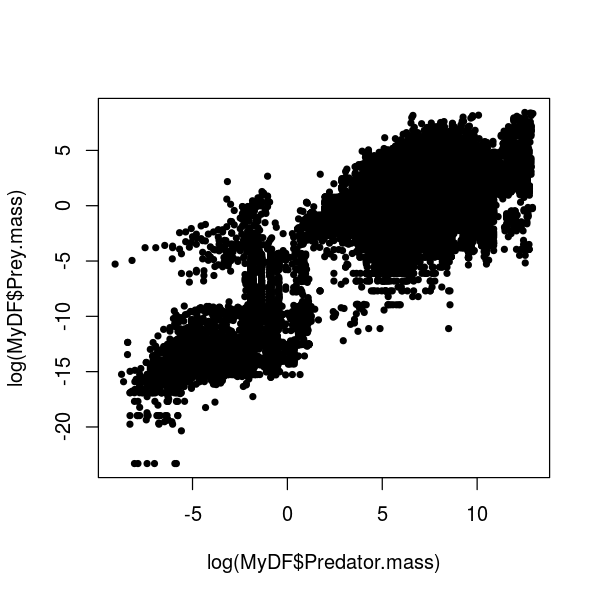

In [24]:
plot(log(MyDF$Predator.mass),log(MyDF$Prey.mass),pch=20) # Change marker

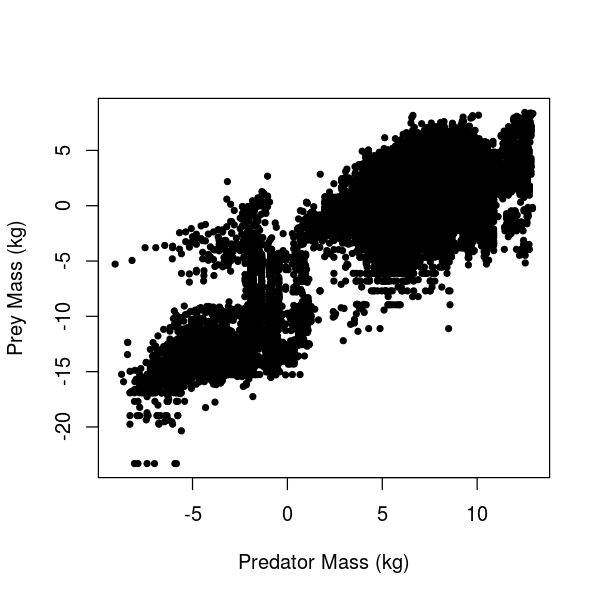

In [25]:
plot(log(MyDF$Predator.mass),log(MyDF$Prey.mass),pch=20, xlab = "Predator Mass (kg)", ylab = "Prey Mass (kg)") # Add labels

A really great summary of basic R graphical parameters can be [found here](https://www.statmethods.net/advgraphs/parameters.html).

### Histograms

Why did we have to take a logarithm to see the relationship between
predator and prey size? Plotting histograms of the two classes
(predator, prey) should be insightful, as we can then see the "marginal"
distributions of the two variables.

Let's first plot a histogram of predator body masses:

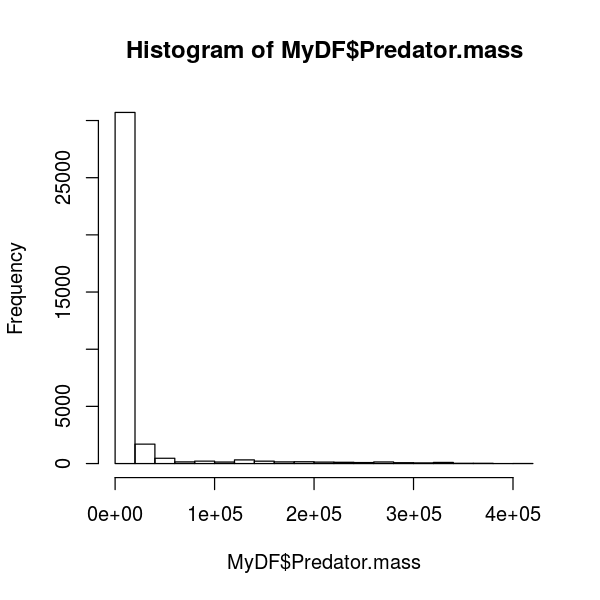

In [26]:
hist(MyDF$Predator.mass)

Clearly, the data are heavily right skewed, with small body sized organisms dominating (that's a general pattern, as mentioned above). Let's now take a logarithm and see if we can get a better idea of what the distribution of predator sizes looks like:

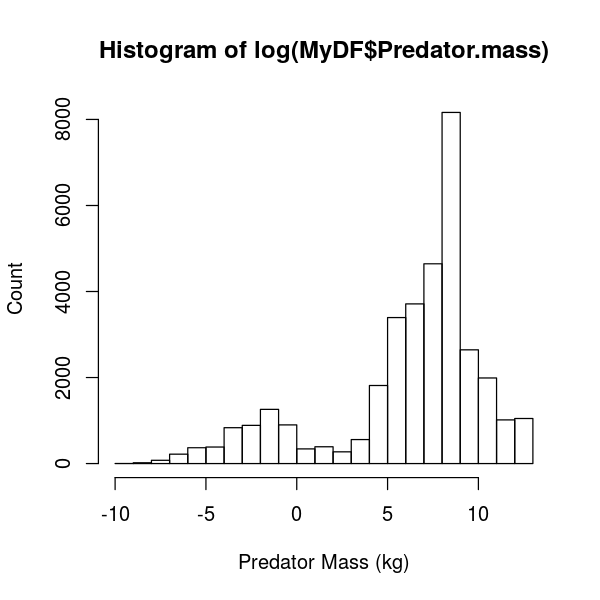

In [27]:
hist(log(MyDF$Predator.mass), xlab = "Predator Mass (kg)", ylab = "Count") # include labels

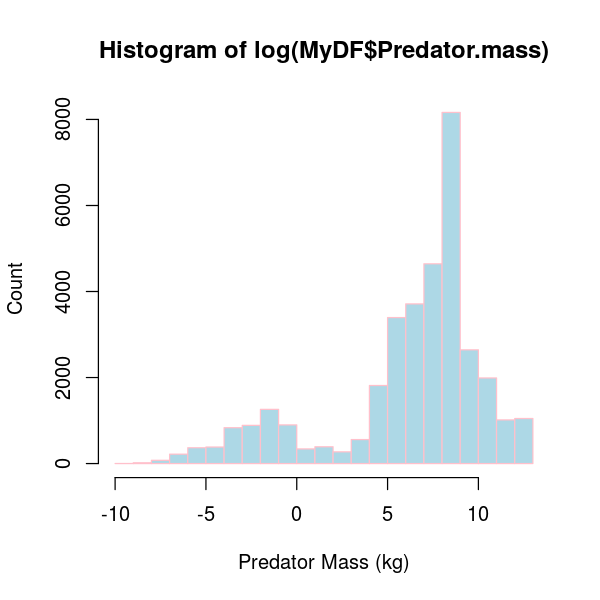

In [28]:
hist(log(MyDF$Predator.mass),xlab="Predator Mass (kg)",ylab="Count", 
    col = "lightblue", border = "pink") # Change bar and borders colors 

So, taking a log really makes clearer what the distribution of body predator sizes looks like. *Try the same with prey body masses.*

#### Exercise

We can do a lot of beautification and fine-tuning of your R plots! As an exercise, try adjusting the histogram bin widths to make them same for the predator and prey, and making the x and y labels larger and in boldface. To get started, look at the help documentation of `hist`.

### Subplots

We can also plot both predator and prey body masses in different sub-plots using `par` so that we can compare them visually.

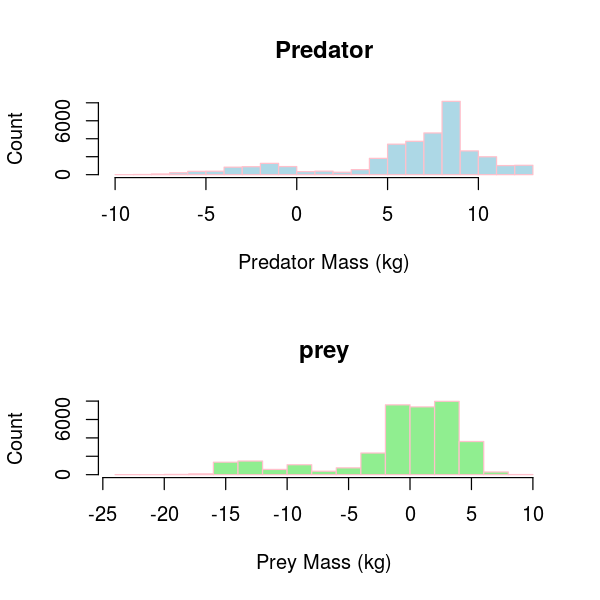

In [29]:
par(mfcol=c(2,1)) #initialize multi-paneled plot
par(mfg = c(1,1)) # specify which sub-plot to use first 
hist(log(MyDF$Predator.mass),
    xlab = "Predator Mass (kg)", ylab = "Count", col = "lightblue", border = "pink", 
    main = 'Predator') # Add title
par(mfg = c(2,1)) # Second sub-plot
hist(log(MyDF$Prey.mass), xlab="Prey Mass (kg)",ylab="Count", col = "lightgreen", border = "pink", main = 'prey')

The `par()` function can set multiple graphics parameters (not just multi-panel plots), including figure margins, axis labels, and more. Check out the [help for this function](https://www.rdocumentation.org/packages/graphics/versions/3.5.1/topics/par).

Another option for making multi-panel plots is the `layout` function.

### Overlaying plots

Better still, we would like to see if the predator mass and prey mass distributions are similar by overlaying them.

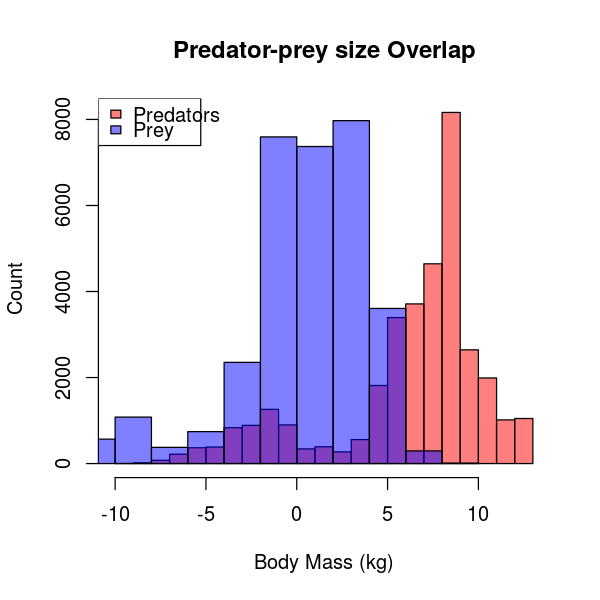

In [30]:
hist(log(MyDF$Predator.mass), # Predator histogram
    xlab="Body Mass (kg)", ylab="Count", 
    col = rgb(1, 0, 0, 0.5), # Note 'rgb', fourth value is transparency
    main = "Predator-prey size Overlap") 
hist(log(MyDF$Prey.mass), col = rgb(0, 0, 1, 0.5), add = T) # Plot prey
legend('topleft',c('Predators','Prey'),   # Add legend
    fill=c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5))) # Define legend colors

Plot annotation with text can be done with either single or double quotes, i.e., 'Plot Title' or "Plot Title", respectively. But it is  generally a good idea to use double quotes because sometimes you would like to use an apostrophe in your title or axis label strings.

#### Exercise 

* It would be nicer to have both the plots with the same bin sizes – try to do it

### Boxplots

Now, let's try plotting boxplots instead of histograms. These are useful for getting a visual summary of the distribution of your data.

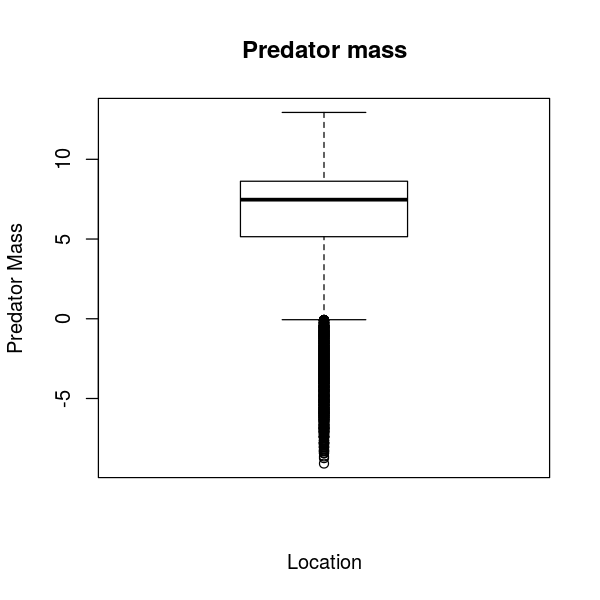

In [31]:
boxplot(log(MyDF$Predator.mass), xlab = "Location", ylab = "Predator Mass", main = "Predator mass")

Now let's see how many locations the data are from:

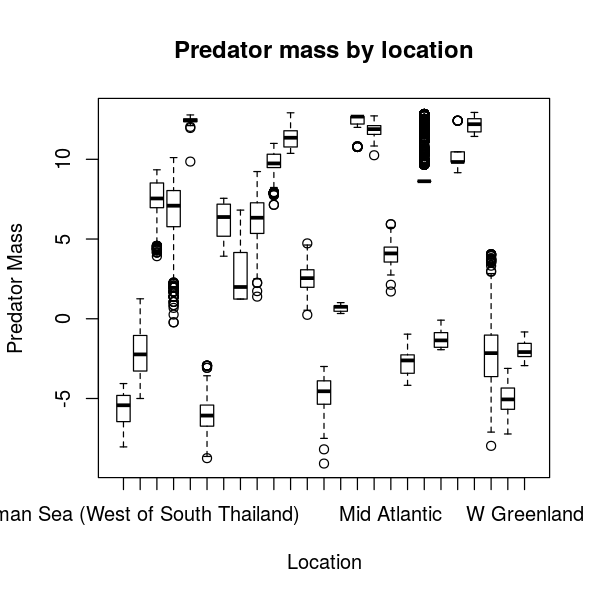

In [32]:
boxplot(log(MyDF$Predator.mass) ~ MyDF$Location, # Why the tilde?
    xlab = "Location", ylab = "Predator Mass",
    main = "Predator mass by location")

Note the tilde (`~`). This is to tell R to subdivide or categorize your analysis and plot by the "Factor" location. More on this later.

That's a lot of locations! You will need an appropriately wide plot to see all the boxplots adequately. Now let's try boxplots by feeding interaction type:

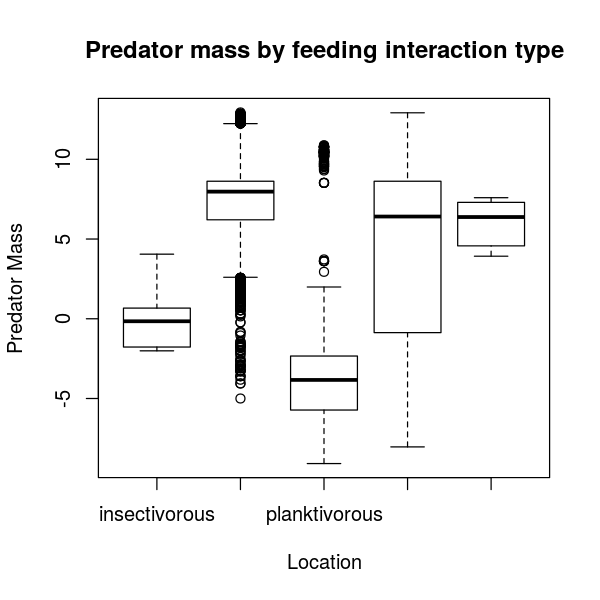

In [33]:
boxplot(log(MyDF$Predator.mass) ~ MyDF$Type.of.feeding.interaction,
    xlab = "Location", ylab = "Predator Mass",
    main = "Predator mass by feeding interaction type")

### Combining plot types

It would be nice to see both the predator and prey (marginal) distributions as well as the scatterplot for an exploratory analysis. We can do this by adding boxplots of the marginal variables to the scatterplot.

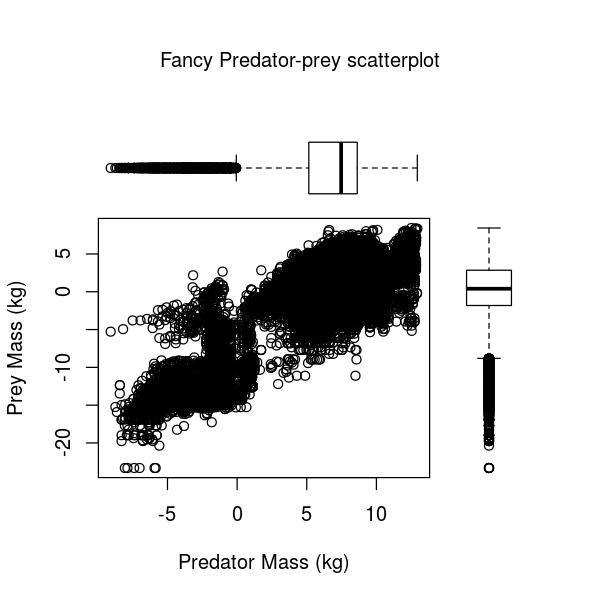

In [34]:
 par(fig=c(0,0.8,0,0.8)) # specify figure size as proportion
 plot(log(MyDF$Predator.mass),log(MyDF$Prey.mass), xlab = "Predator Mass (kg)", ylab = "Prey Mass (kg)") # Add labels
 par(fig=c(0,0.8,0.4,1), new=TRUE)
 boxplot(log(MyDF$Predator.mass), horizontal=TRUE, axes=FALSE)
 par(fig=c(0.55,1,0,0.8),new=TRUE)
 boxplot(log(MyDF$Prey.mass), axes=FALSE)
 mtext("Fancy Predator-prey scatterplot", side=3, outer=TRUE, line=-3)

To understand this plotting method, think of the full graph area as going from (0,0) in the lower left corner to (1,1) in the upper right corner. The format of the `fig=` parameter is a numerical vector of the form `c(x1, x2, y1, y2)`, corresponding to `c(bottom, left, top, right)`. First, ` par(fig=c(0,0.8,0,0.8))` sets up the scatterplot going from 0 to 0.8 on the x axis and 0 to 0.8 on the y axis, leaving some area for the boxplots at the top and right. The top boxplot goes from 0 to 0.8 on the x axis and 0.4 to 1 on the y axis. The right hand boxplot goes from 0.55 to 1 on the x axis and 0 to 0.8 on the y axis. You can experiment with these proportions to change the spacings between plots.

This plot is useful, because it shows you what the marginal distributions of the two variables (Predator mass and Prey mass) are. 

### Lattice plots

You can also make lattice graphs to avoid the somewhat laborious `par()` approach above of getting multi-panel plots. For this, you will need to load a library that isn't included by default when you run R:

In [35]:
library(lattice)

Let's make a lattice plot of body mass by densities (distributions) by type of feeding interaction:

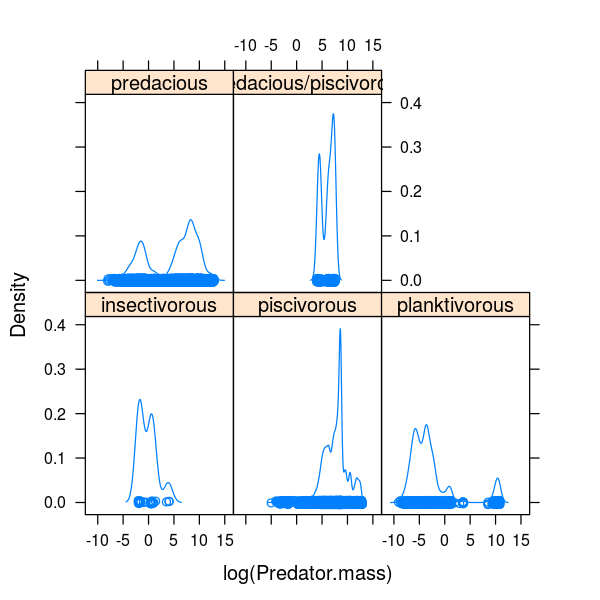

In [36]:
densityplot(~log(Predator.mass) | Type.of.feeding.interaction, data=MyDF)

This is not very pretty, but does the job. Below you will learn to use `ggplot` to produce a much more elegant, pretty multi-panel plots. 


### Saving your graphics

And you can also save the figure in a vector graphics format like a pdf. It is important to learn to do this, because you want to be able to save your plots in good resolution, and want to avoid the manual steps of
clicking on the figure, doing "save as", etc. So let's save the figure as a PDF:

In [37]:
pdf("../results/Pred_Prey_Overlay.pdf", # Open blank pdf page using a relative path
    11.7, 8.3) # These numbers are page dimensions in inches
hist(log(MyDF$Predator.mass), # Plot predator histogram (note 'rgb')
    xlab="Body Mass (kg)", ylab="Count", col = rgb(1, 0, 0, 0.5), main = "Predator-Prey Size Overlap") 
hist(log(MyDF$Prey.mass), # Plot prey weights
    col = rgb(0, 0, 1, 0.5), 
    add = T)  # Add to same plot = TRUE
legend('topleft',c('Predators','Prey'), # Add legend
    fill=c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5))) 
graphics.off(); #you can also use dev.off() 

Always try to save results in a vector format, which can be scaled up to any size. For more on vector vs raster images/graphics, [see this](https://en.wikipedia.org/wiki/Vector_graphics).

Note that you are saving to the `Results` directory now. This is a recommended project organization and workflow: store and retrieve data from a `
Data` directory, keep your code and work from a `Code` directory, and save outputs to a `Results` directory.

You can also try other graphic output formats. For example, `png()` (a raster format) instead of `pdf()`. As always, look at the help documentation of each of these commands!

## Practicals

In this practical, you will write script that draws and saves three lattice graphs by feeding interaction type: one of predator mass, one of prey mass and one of the size ratio of prey mass over predator mass. Note that you would want to use logarithms of masses (or mass-ratios)for all three plots. In addition, the script will calculate the mean and median predator mass, prey mass and predator-prey size-ratios to a csv file. So:

* Write a script file called `PP_Lattice.R` and save it in the `Code` directory — sourcing or running this script should result in three files called `Pred_Lattice.pdf`, ` Prey_Lattice.pdf`, and `SizeRatio_Lattice.pdf` being
saved in the `Results` directory (the names should be self-explanatory).

In addition, the script should calculate the mean and median log predator mass, prey mass, and predator-prey size ratio, *by feeding type*, and save it as a single csv output table called `PP_Results.csv` to the `Results` directory. The table should have appropriate headers (e.g., Feeding type, Mean, Median). (Hint: you will have to initialize a new dataframe or matrix in the script to first store the calculations)

The script should be self-sufficient and not need any external inputs — it should import the above predator-prey dataset from the appropriate directory, and save the graphic plots to the appropriate directory (Hint: use relative paths!).

There are multiple ways to do this practical. The plotting and saving component is simple enough. For calculating the statistics by feeding type, you can either use the "loopy" way — first obtaining a list of feeding types (look up the `unique` or `levels` functions) and then loop over them, using `subset` to extract the dataset by feeding type at each iteration, or the R-savvy way, by using `tapply` or `ddply` and avoiding looping altogether.

## High-quality graphics in R

R can produce beautiful graphics/visualizations, but it typically takes a lot of work to obtain the desired result. This is because the starting point is pretty much a "bare" plot, and adding features commonly required for publication-grade figures (legends, statistics, regressions, sub-plotting etc.) can require a lot of small and painful additional arguments to the plotting commands *at the same time*, or even additional steps (such as the [fancy predator-prey scatterplot](#Combining-plot-types) above).

Moreover, it is very difficult to switch from one representation of the data to another (i.e., from boxplots to scatterplots), or to plot several datasets together. The R package `ggplot2` overcomes these issues, and produces truly high-quality, publication-ready graphics suitable for papers, theses and reports.

>**3D plots:** *Currently, `ggplot2` cannot be used to create 3D graphs or mosaic plots. In any case, most of you won't be needing 3D plots. If you do, there are many ways to do 3D plots using other plotting packages in R. In particular, look up the `scatterplot3d` and `plot3D` packages.*

`ggplot2` differs from other approaches as it attempts to provide a "grammar" for graphics in which each layer is the equivalent of a verb, subject etc. and a plot is the equivalent of a sentence. All graphs start with a layer showing the data, other layers and attributes/styles are added to modify the plot. Specifically, according to this grammar, a statistical graphic is a "mapping" from data to geometric objects (points, lines, bars; set using `geom`) with aesthetic attributes (colour, shape, size; set using `aes`).

For more on the ideas underlying ggplot, see the book "ggplot2: Elegant Graphics for Data Analysis", by H. Wickham (in your Reading directory). Also, the [ggplot2 website](http://ggplot2.tidyverse.org/) is an excellent resource.

If `ggplot2` is not available on your computer, look up the section on installing packages in the [R Chapter](07-R.ipynb).

ggplot can be used in two ways: with `qplot` (for `q`uick ` plot`ting) and `ggplot` for fully customized plotting.

*Note that `ggplot2` only accepts data in data frames.*

### Basic plotting with `qplot`

`qplot` can be used to quickly produce graphics for exploratory data analysis, and as a base for more complex graphics. It uses syntax that is closer to the standard R plotting commands.

We will use the same predator-prey body size dataset again – you will soon see how much nice the same types of plots you made above look when done with ggplot!

First, load the package:

In [38]:
require(ggplot2)  ## Load the package

Loading required package: ggplot2


#### Scatterplots

Let's start plotting the `Predator.mass` vs `Prey.mass`:

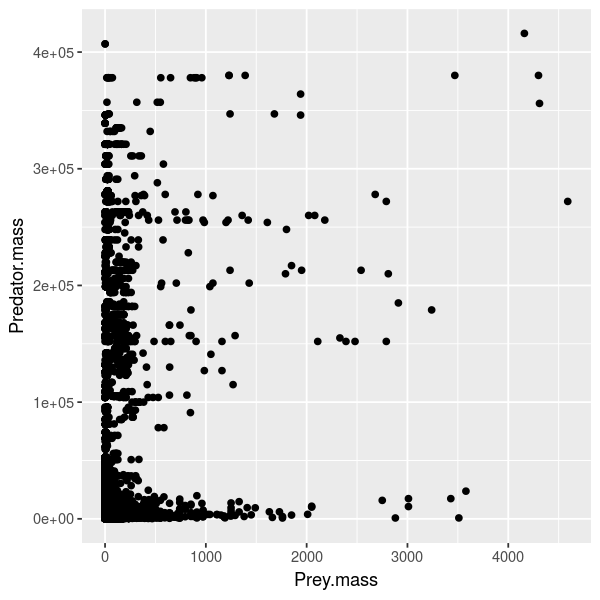

In [39]:
qplot(Prey.mass, Predator.mass, data = MyDF)

As before, let's take logarithms and plot:

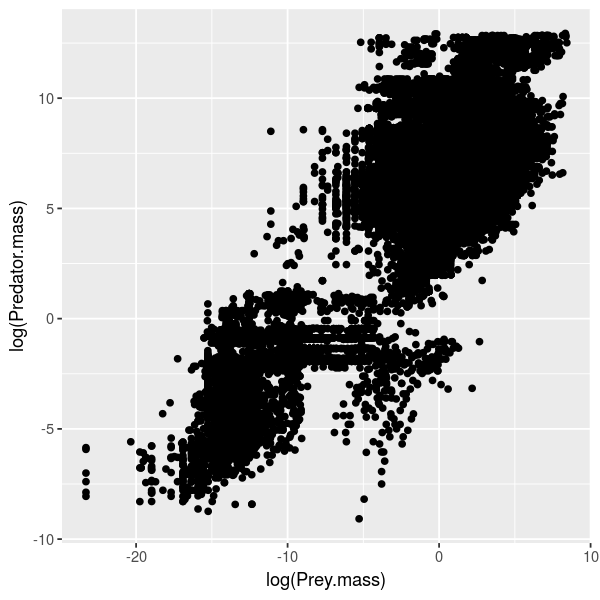

In [40]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF)

Now, color the points according to the type of feeding interaction:

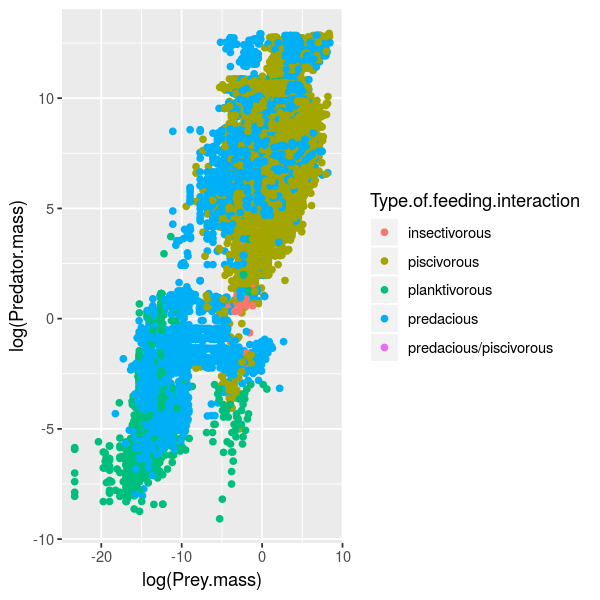

In [41]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, colour = Type.of.feeding.interaction)

The same as above, but changing the shape:

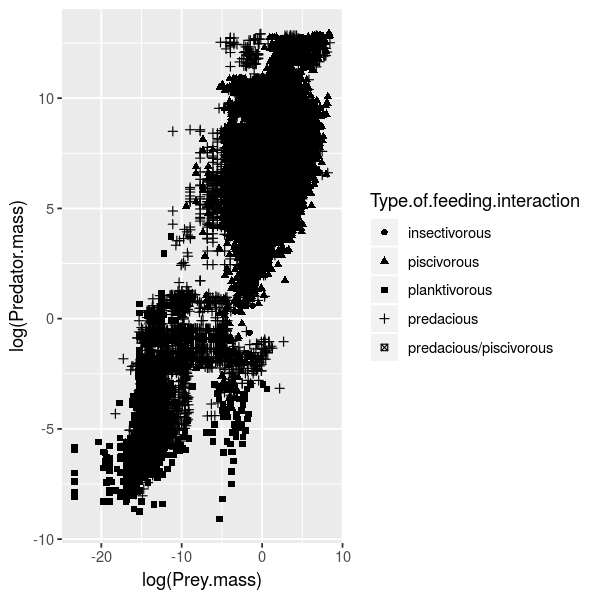

In [42]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, shape = Type.of.feeding.interaction)

#### Aesthetic mappings

These examples demonstrate a key difference between `qplot` and the standard `plot` command: When you want to assign colours, sizes or shapes to the points on your plot, using the `plot` command, it's your responsibility to convert (i.e., "map") a categorical variable in your data (e.g., type of feeding interaction in the above case) onto colors (or shapes) that `plot` knows how to use (e.g., by specifying "red", "blue", "green", etc).

ggplot does this mapping for you automatically, and also provides a legend! This makes it really easy to quickly include additional data (e.g., if a new feeding interaction type was added to the data) on the plot.

Instead of using ggplot's automatic mapping, if you want to manually set a color or a shape, you have to use `I()` (meaning "Identity"). To see this in practice, try the following:

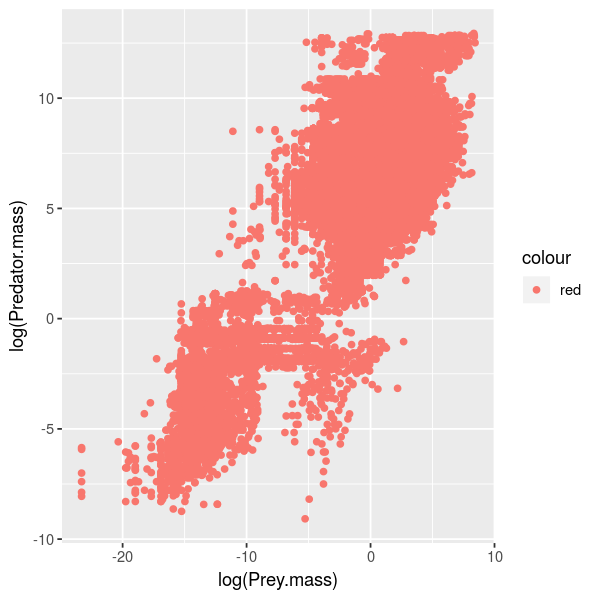

In [43]:
qplot(log(Prey.mass), log(Predator.mass), 
    data = MyDF, colour = "red")

You chose red, but ggplot used mapping to convert it to a particular
shade of red. To set it manually to the real red, do this:

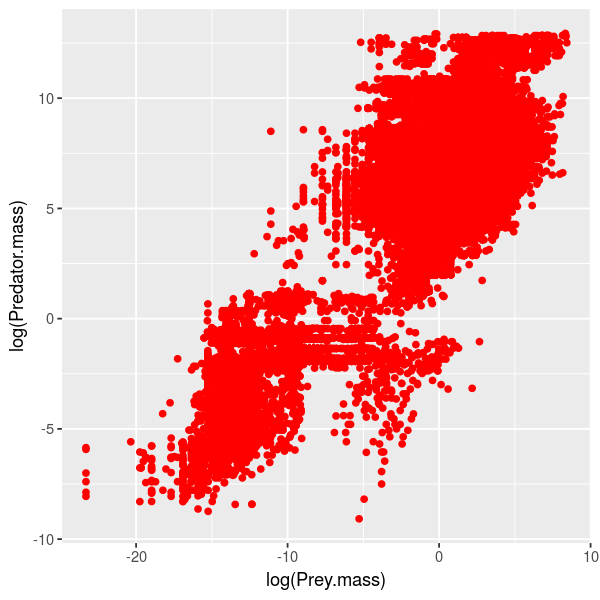

In [44]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, colour = I("red"))

Similarly, for point size, compare these two:

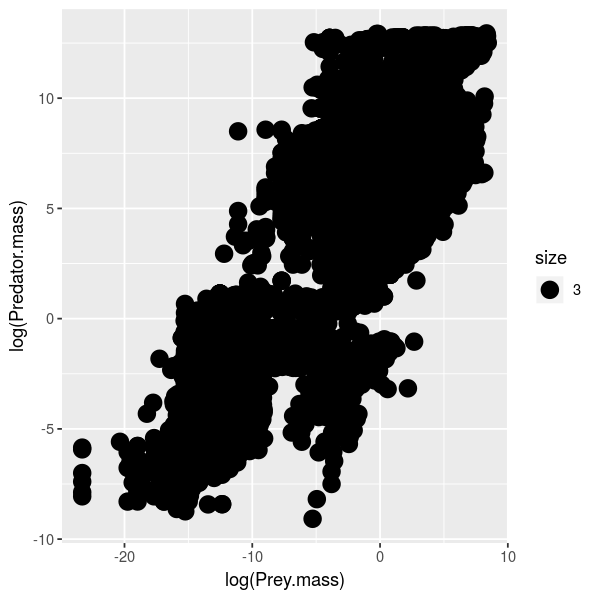

In [45]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, size = 3) #with ggplot size mapping

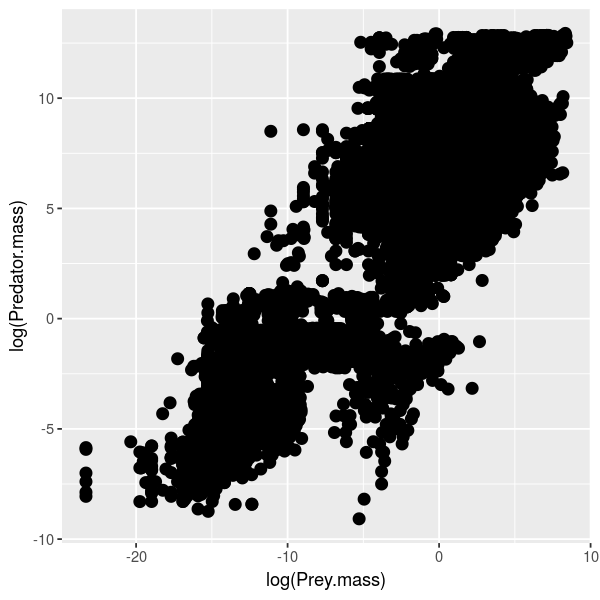

In [46]:
qplot(log(Prey.mass), log(Predator.mass),  data = MyDF, size = I(3)) #no mapping

But for shape, ggplot doesn't have a continuous mapping because shapes are a discrete variable.So

```r
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, shape = 3)
```
will give an error.

Instead, try this: 

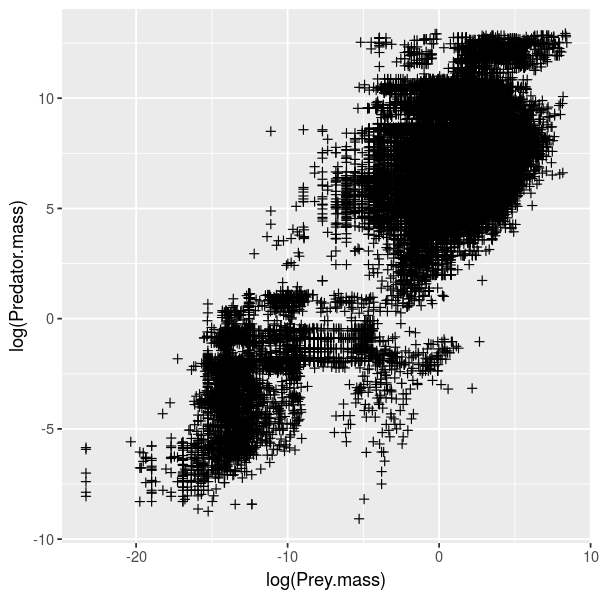

In [51]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, shape= I(3))

#### Setting transparency

Because there are so many points, we can make them semi-transparent using `alpha` so that the overlaps can be seen:

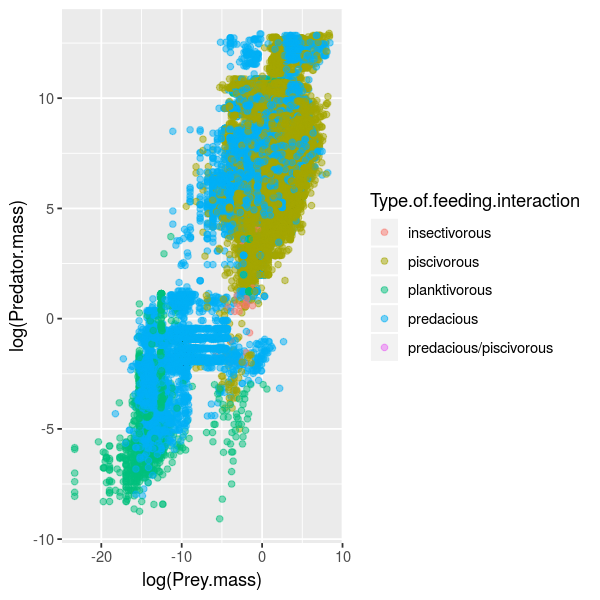

In [54]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, colour = Type.of.feeding.interaction, alpha = I(.5))

Here, try using `alpha = .5` instead of `alpha = I(.5)` and see what happens.

#### Adding smoothers and regression lines

Now add a smoother to the points:

`geom_smooth()` using method = 'gam'


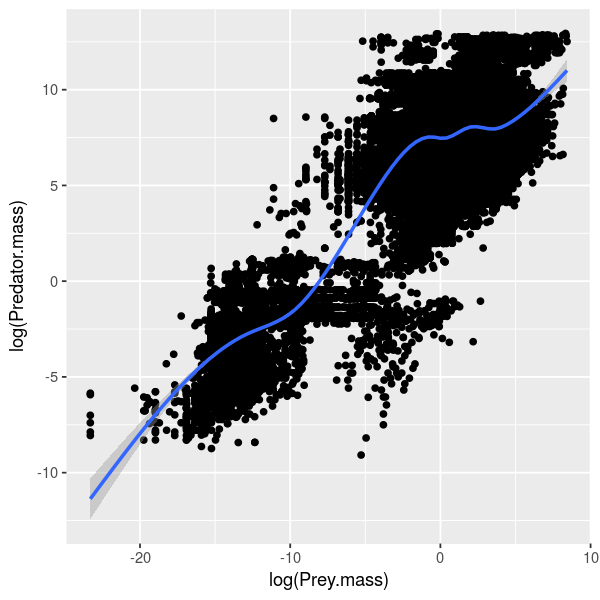

In [49]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, geom = c("point", "smooth"))

If we want to have a linear regression, we need to specify the method as
being `lm`:

`geom_smooth()` using method = 'gam'


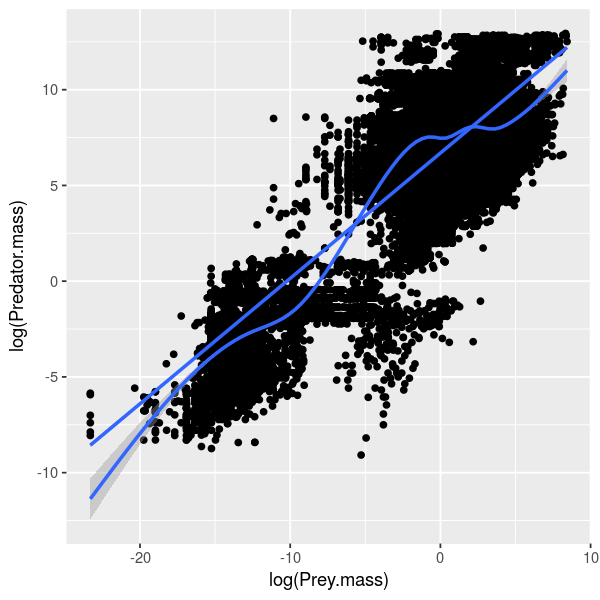

In [50]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, geom = c("point", "smooth")) + geom_smooth(method = "lm")

`lm` stands for `l`inear `m`odels (linear regression is a type of linear model). 

We can also add a "smoother" for each type of interaction:

`geom_smooth()` using method = 'gam'


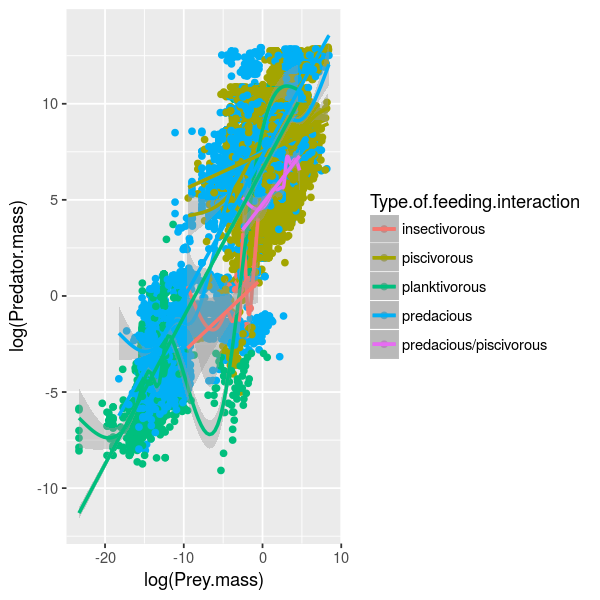

In [51]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, geom = c("point", "smooth"), 
      colour = Type.of.feeding.interaction) + geom_smooth(method = "lm")

To extend the lines to the full range, use `fullrange = TRUE`:

`geom_smooth()` using method = 'gam'


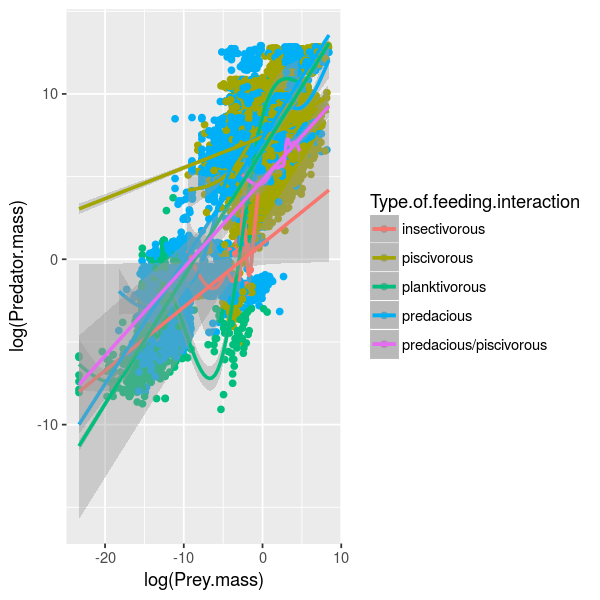

In [52]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, geom = c("point", "smooth"),
      colour = Type.of.feeding.interaction) + geom_smooth(method = "lm",fullrange = TRUE)

Now let's see how the ratio between prey and predator mass changes according to the type of interaction:

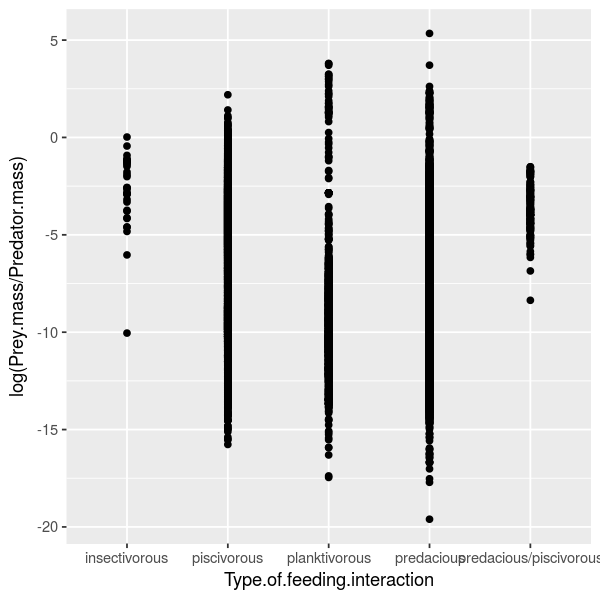

In [53]:
qplot(Type.of.feeding.interaction, log(Prey.mass/Predator.mass), data = MyDF)

Because there are so many points, we can "jitter" them to get a better
idea of the spread:

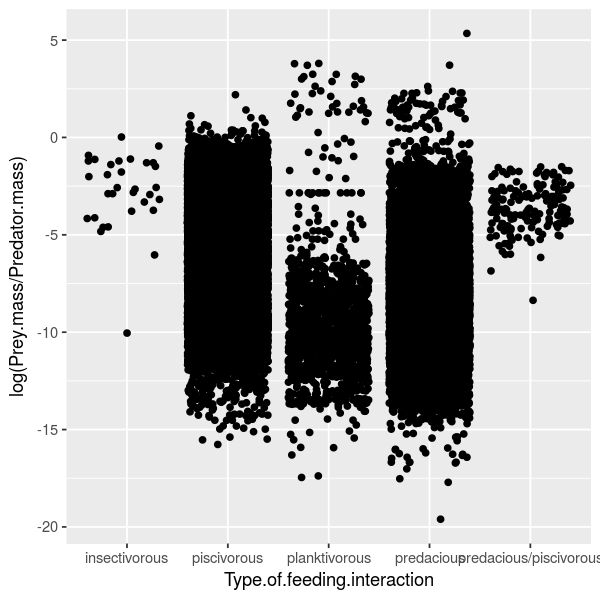

In [54]:
qplot(Type.of.feeding.interaction, log(Prey.mass/Predator.mass), data = MyDF, geom = "jitter")

#### Boxplots

Or we can draw a boxplot of the data (note the `geom` argument, which stands for `geom`etry):

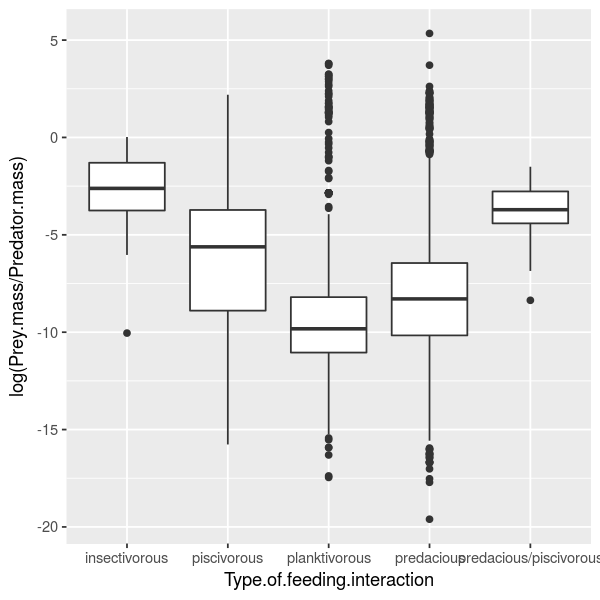

In [55]:
qplot(Type.of.feeding.interaction, log(Prey.mass/Predator.mass), data = MyDF, geom = "boxplot")

#### Histograms and density plots

Now let's draw an histogram of predator-prey mass ratios:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


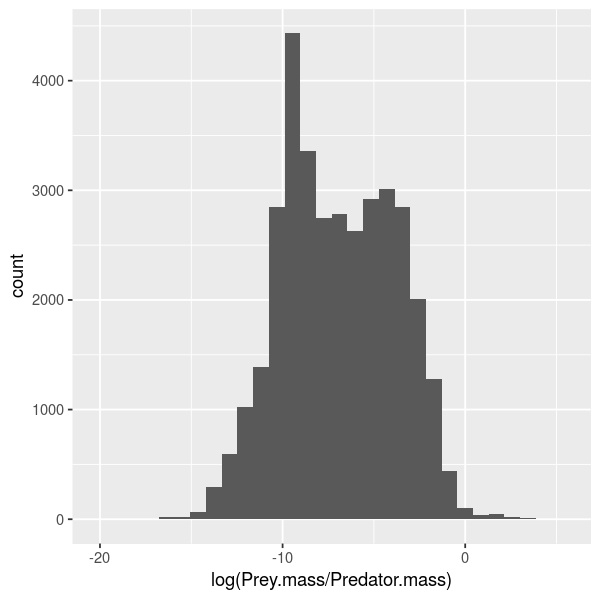

In [56]:
qplot(log(Prey.mass/Predator.mass), data = MyDF, geom =  "histogram")

Color the histogram according to the interaction type:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


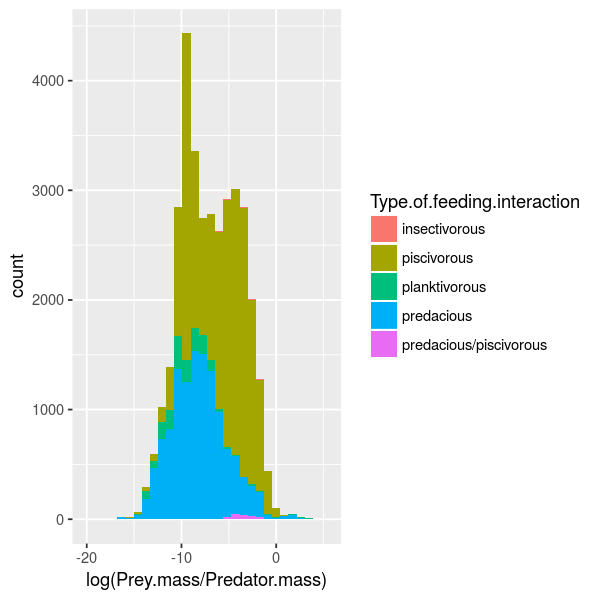

In [57]:
qplot(log(Prey.mass/Predator.mass), data = MyDF, geom =  "histogram", 
      fill = Type.of.feeding.interaction)

You may want to define binwidth (in units of x axis):

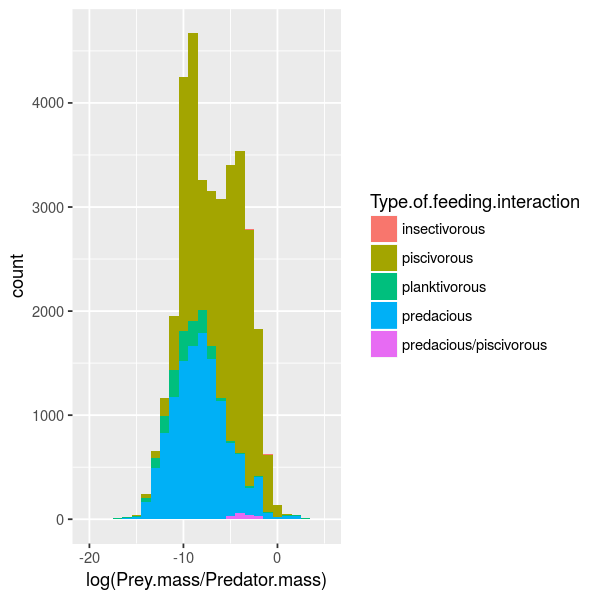

In [58]:
qplot(log(Prey.mass/Predator.mass), data = MyDF, geom =  "histogram", 
      fill = Type.of.feeding.interaction, binwidth = 1)

To make it easier to read, we can plot the smoothed density of the data:

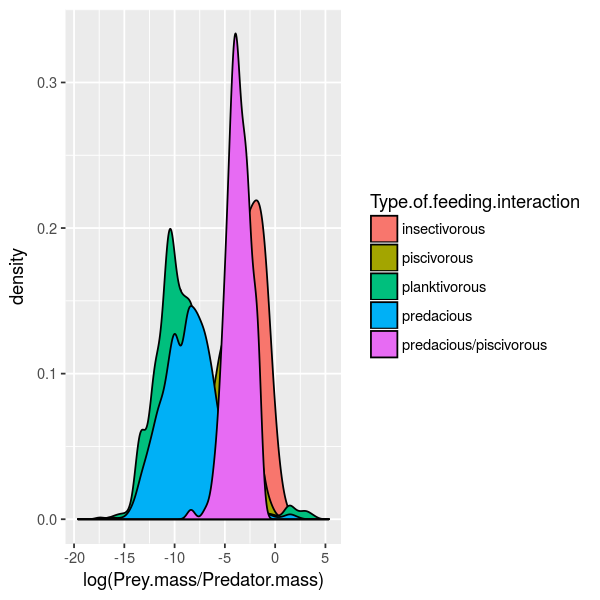

In [59]:
qplot(log(Prey.mass/Predator.mass), data = MyDF, geom =  "density", 
      fill = Type.of.feeding.interaction)

And you can make the densities transparent so that the overlaps are visible:

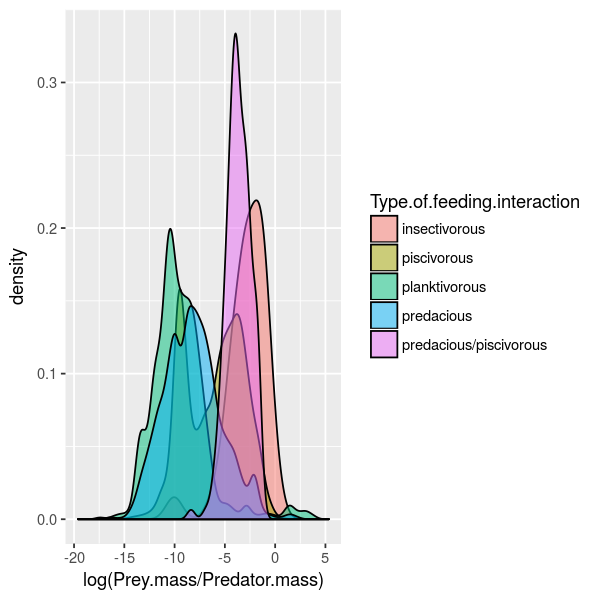

In [60]:
qplot(log(Prey.mass/Predator.mass), data = MyDF, geom =  "density", 
      fill = Type.of.feeding.interaction, 
      alpha = I(0.5))

or using `colour` instead of `fill` draws only the edge of the curve:

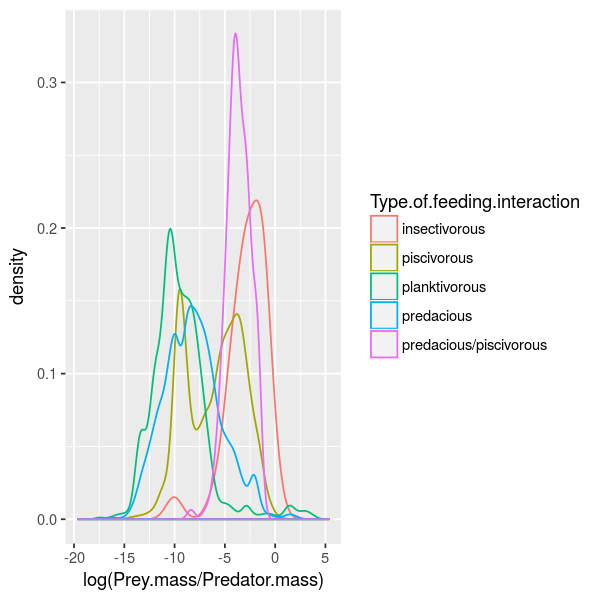

In [61]:
qplot(log(Prey.mass/Predator.mass), data = MyDF, geom =  "density", 
      colour = Type.of.feeding.interaction)

Similarly, `geom = "bar"` produces a barplot, `geom = "line"` a series of points joined by a line, etc.

#### Multi-faceted plots

An alternative way of displaying data belonging to different classes is using "faceting". We did this using ` lattice()` previously, but ggplot does a much nicer job:

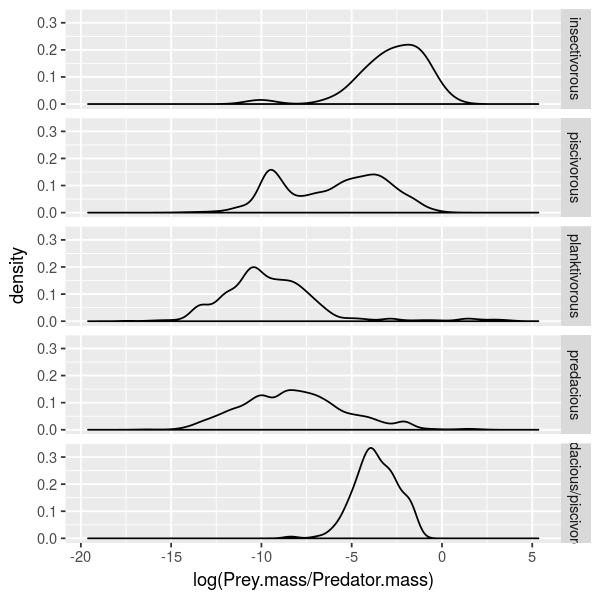

In [62]:
qplot(log(Prey.mass/Predator.mass), facets = Type.of.feeding.interaction ~., data = MyDF, geom =  "density")

The `~.` (the space is not important) notation tells ggplot whether to do the faceting by row or by column. So if you want a by-column configuration, switch `~` and `.`, and also swap the position of the `.~`:

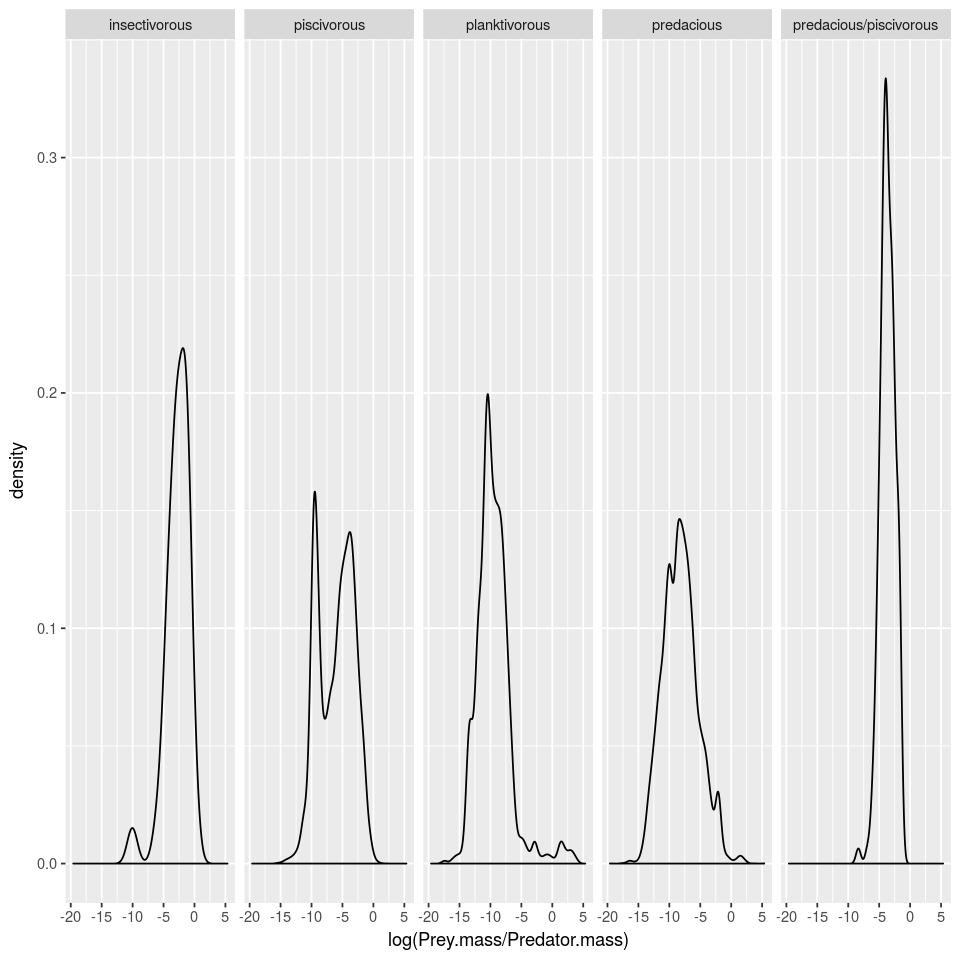

In [71]:
qplot(log(Prey.mass/Predator.mass), facets =  .~ Type.of.feeding.interaction, data = MyDF, geom =  "density")

You can also facet by a combination of categories (this is going to be a big plot!):

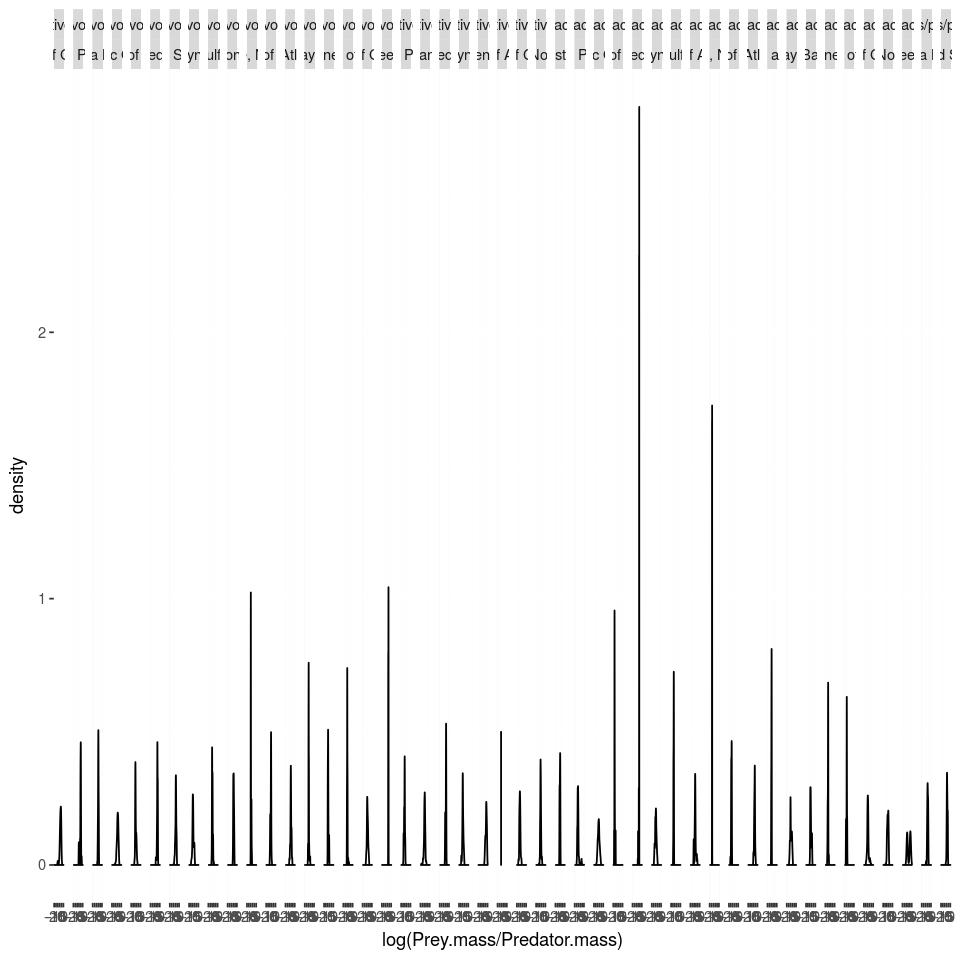

In [72]:
qplot(log(Prey.mass/Predator.mass), facets = .~ Type.of.feeding.interaction + Location, 
      data = MyDF, geom =  "density")

And you can also change the order of the combination:

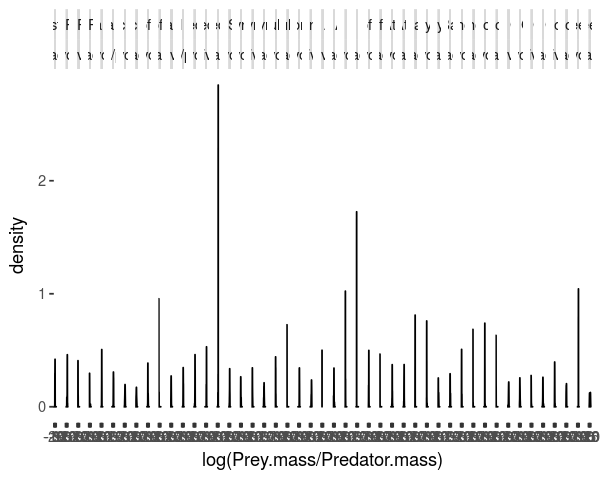

In [65]:
qplot(log(Prey.mass/Predator.mass), facets = .~ Location + Type.of.feeding.interaction, 
    data = MyDF, geom =  "density")

For more fine-tuned faceting, look up the `facet_grid()` and `facet_wrap()` functions within `ggplot2`. Look up this variant of the [R Cookbook](http://www.cookbook-r.com/Graphs) for more examples.

#### Logarithmic axes

A better way to plot data in the log scale is to also set the axes to be logarithmic:

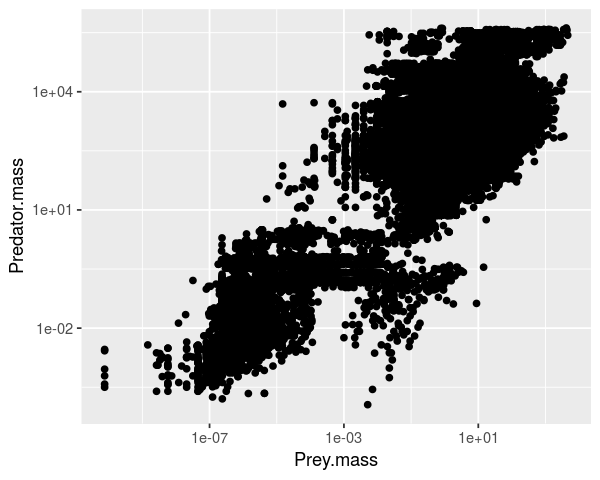

In [66]:
qplot(Prey.mass, Predator.mass, data = MyDF, log="xy")

#### Plot annotations

Let's add a title and labels:

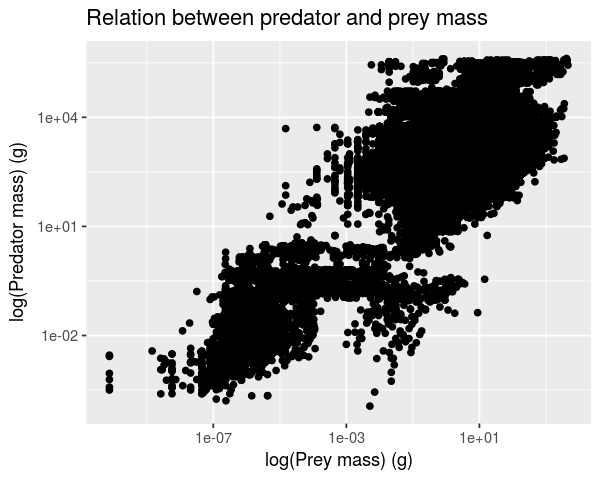

In [67]:
qplot(Prey.mass, Predator.mass, data = MyDF, log="xy",
    main = "Relation between predator and prey mass", 
    xlab = "log(Prey mass) (g)", 
    ylab = "log(Predator mass) (g)")

Adding `+ theme_bw()` makes it suitable for black and white printing.

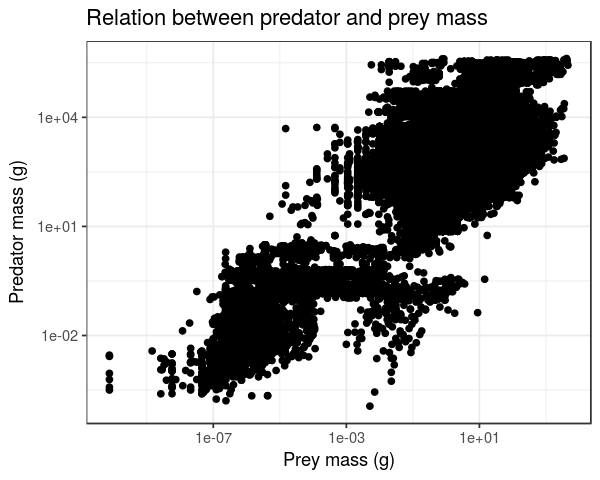

In [68]:
qplot(Prey.mass, Predator.mass, data = MyDF, log="xy",
    main = "Relation between predator and prey mass", 
    xlab = "Prey mass (g)", 
    ylab = "Predator mass (g)") + theme_bw()

#### Saving your plots

Finally, let's save a pdf file of the figure (same approach as we [used before](#Saving-your-graphics)):

In [69]:
pdf("../results/MyFirst-ggplot2-Figure.pdf")
print(qplot(Prey.mass, Predator.mass, data = MyDF,log="xy",
    main = "Relation between predator and prey mass", 
    xlab = "log(Prey mass) (g)", 
    ylab = "log(Predator mass) (g)") + theme_bw())
dev.off()

png 
  2

Using `print` ensures that the whole command is kept together and that you can use the command in a script.

### Some more important ggplot options

Other important options to keep in mind:

|               |                |
|:------------- |:------------- |
|`xlim`      | limits for x axis: `xlim = c(0,12)`|
|`ylim`      | limits for y axis|
|`log`       |log transform variable `log = "x"`, `log = "y"`, `log = "xy"`|
|`main`      |title of the plot `main = "My Graph"`|
|`xlab`      |x-axis label|
|`ylab`      |y-axis label|
|`asp`       | aspect ratio `asp = 2`, `asp = 0.5`|
|`margins`   |whether or not margins will be displayed|


### Various `geom`

`geom` Specifies the geometric objects that define the graph type. The geom option is expressed as a R character vector with one or more entries. geom values include "point", "smooth", "boxplot", "line", "histogram", "density", "bar", and "jitter".

Try the following:

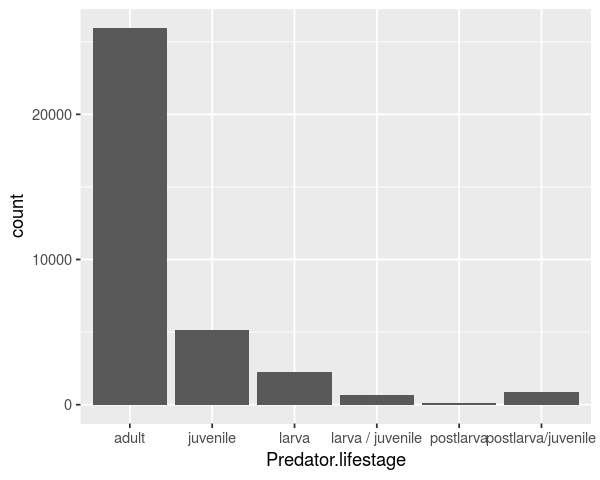

In [70]:
# load the data
MyDF <- as.data.frame(read.csv("../data/EcolArchives-E089-51-D1.csv"))

# barplot
qplot(Predator.lifestage, data = MyDF, geom = "bar")

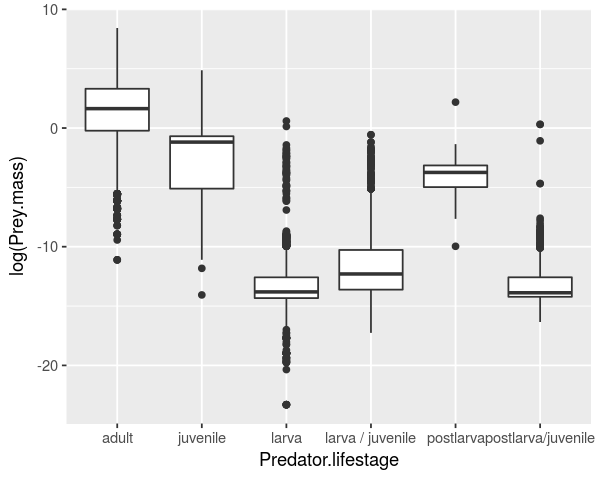

In [71]:
# boxplot
qplot(Predator.lifestage, log(Prey.mass), data = MyDF, geom = "boxplot")

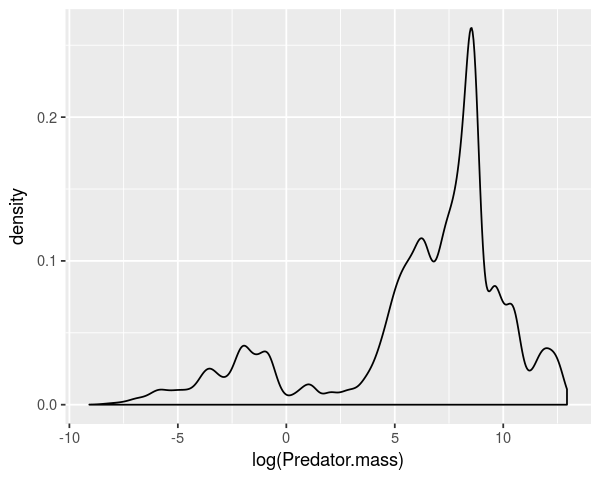

In [72]:
# density
qplot(log(Predator.mass), data = MyDF, geom = "density")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


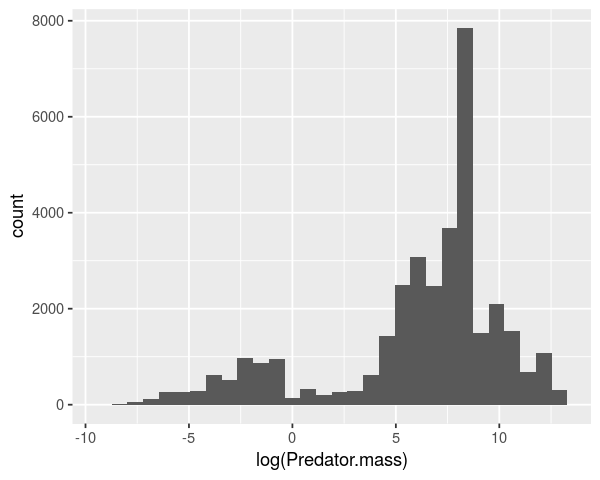

In [73]:
# histogram
qplot(log(Predator.mass), data = MyDF, geom = "histogram")

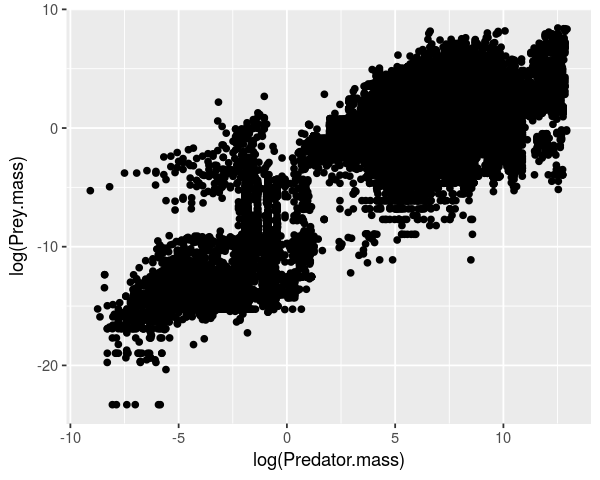

In [74]:
# scatterplot
qplot(log(Predator.mass), log(Prey.mass), data = MyDF, geom = "point")

`geom_smooth()` using method = 'gam'


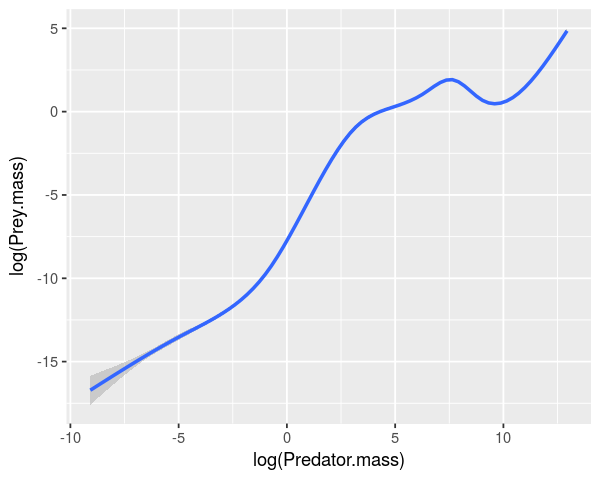

In [75]:
# smooth
qplot(log(Predator.mass), log(Prey.mass), data = MyDF, geom = "smooth")

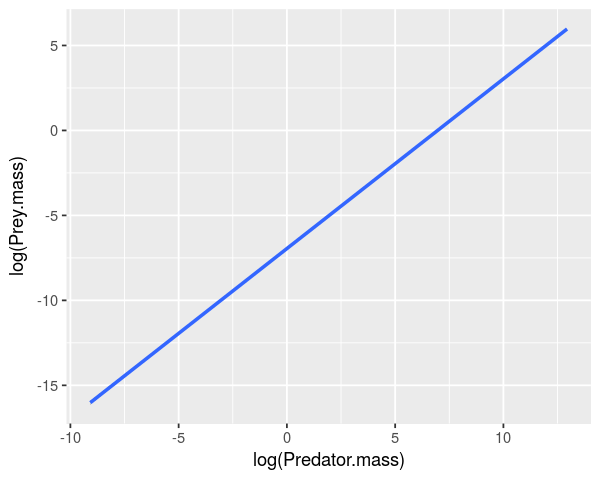

In [76]:
qplot(log(Predator.mass), log(Prey.mass), data = MyDF, geom = "smooth", method = "lm")

### Advanced plotting: `ggplot`

The command `qplot` allows you to use only a single dataset and a single set of "aesthetics" (x, y, etc.). To make full use of `ggplot2`, we need to use the command `ggplot`, which allows you to use "layering". Layering is the mechanism by which additional data elements are added to a plot. Each layer can come from a different dataset and have a different aesthetic mapping, allowing us to create plots that could not be generated using `qplot()`, which permits only a single dataset and a single set of aesthetic mappings.

For a `ggplot` plotting command, we need at least:

-   The data to be plotted, in a data frame;

-   Aesthetics mappings, specifying which variables we want to plot, and how;

-   The `geom`, defining the geometry for representing the data;

-   (Optionally) some `stat` that transforms the data or performs statistics using the data.

To start a graph, we must specify the data and the aesthetics:

In [77]:
p <- ggplot(MyDF, aes(x = log(Predator.mass),
                y = log(Prey.mass),
                colour = Type.of.feeding.interaction))

Here we have created a graphics object `p` to which we can add layers and other plot elements.

Now try to plot the graph:

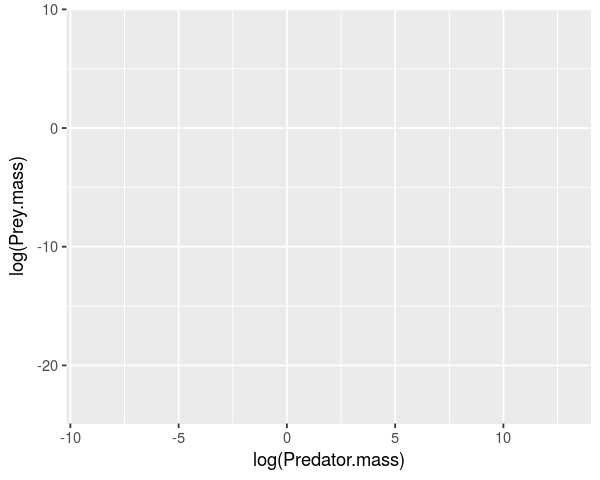

In [78]:
p

PLot is blank because we are yet to specify a geometry — only then can we see the graph:

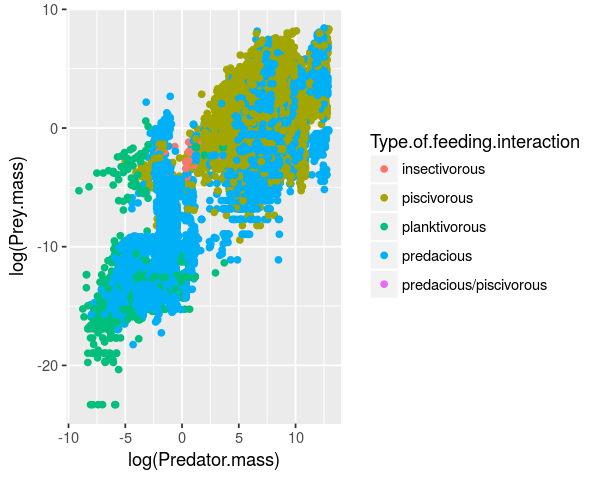

In [79]:
p + geom_point()

We can use the "+" sign to concatenate different commands:

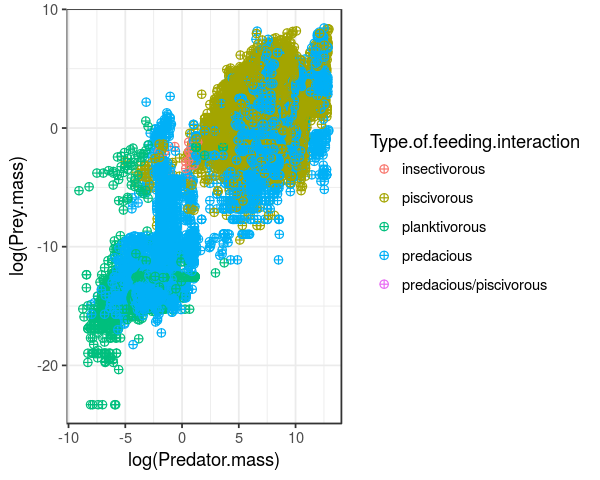

In [80]:
p <- ggplot(MyDF, aes(x = log(Predator.mass), y = log(Prey.mass), colour = Type.of.feeding.interaction ))
q <- p + geom_point(size=I(2), shape=I(10)) + theme_bw()
q

Let's remove the legend:

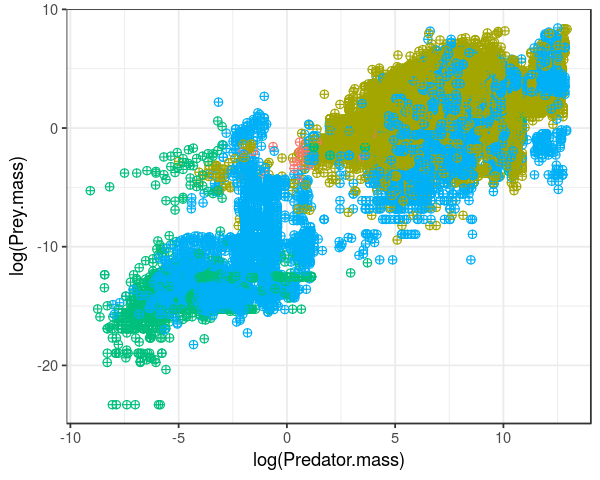

In [81]:
q + theme(legend.position = "none")

### Some useful ggplot examples 


### Plotting a matrix

Let's plot the values of a matrix. This is basically the same as rendering a 2D image. We will visualize random values taken from a unform distribution $\mathcal U [0,1]$. Because we want to plot a matrix, and ggplot2 accepts only dataframes, we use the package reshape2, which can "melt" a matrix into a dataframe:

In [82]:
require(reshape2)

In [83]:
GenerateMatrix <- function(N){
    M <- matrix(runif(N * N), N, N)
    return(M)
}

In [84]:
M <- GenerateMatrix(10)
Melt <- melt(M)

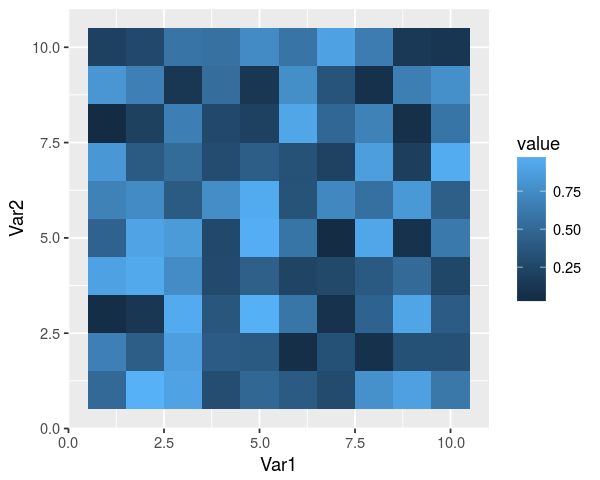

In [85]:
p <- ggplot(Melt, aes(Var1, Var2, fill = value)) + geom_tile()
p

Add a black line dividing cells:

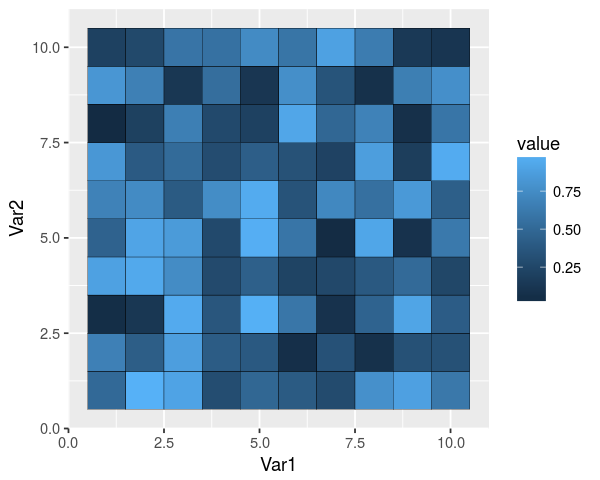

In [86]:
p + geom_tile(colour = "black")

Remove the legend:

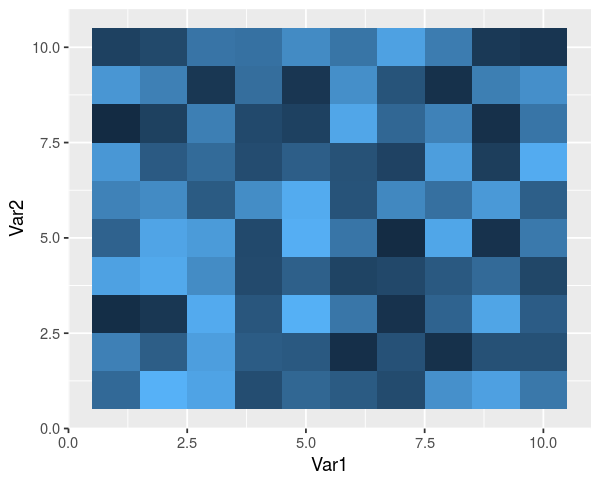

In [87]:
p + theme(legend.position = "none")

Remove all the rest:

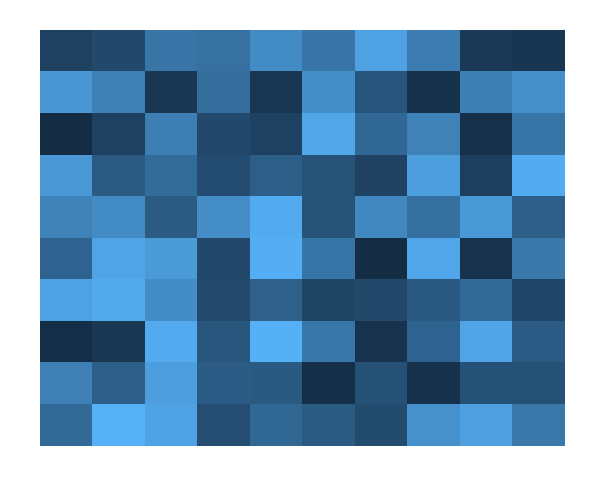

In [88]:
p + theme(legend.position = "none", 
     panel.background = element_blank(),
     axis.ticks = element_blank(), 
     panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     axis.text.x = element_blank(),
     axis.title.x = element_blank(),
     axis.text.y = element_blank(),
     axis.title.y = element_blank())

Explore some colors:

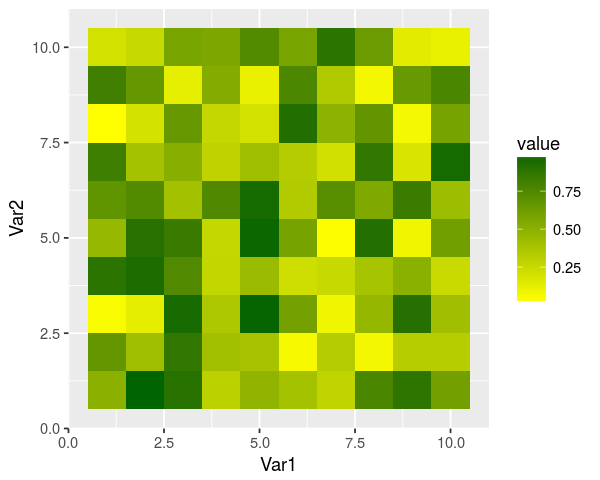

In [89]:
p + scale_fill_continuous(low = "yellow", high = "darkgreen")

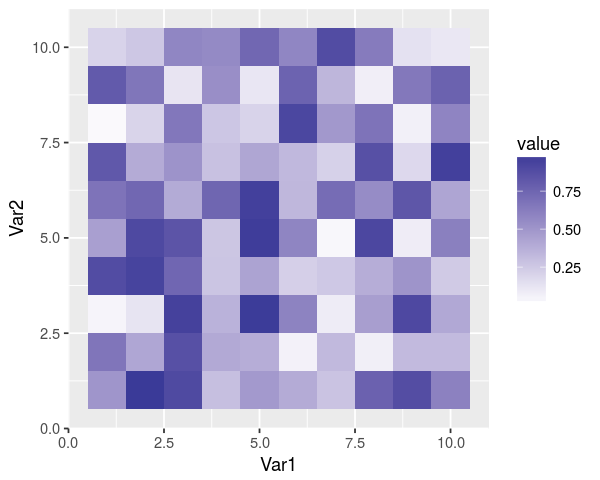

In [90]:
p + scale_fill_gradient2()

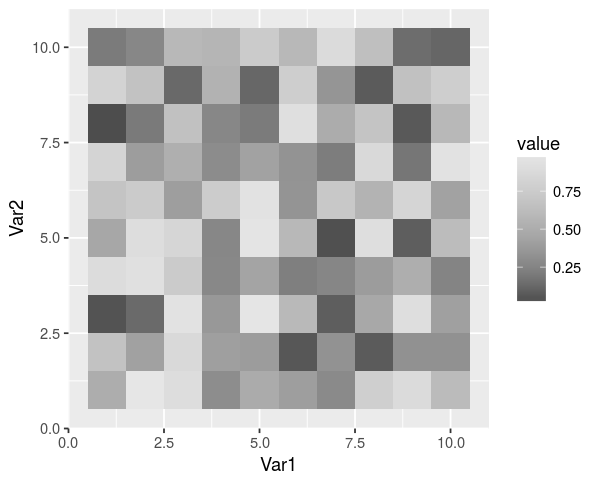

In [91]:
p + scale_fill_gradientn(colours = grey.colors(10))

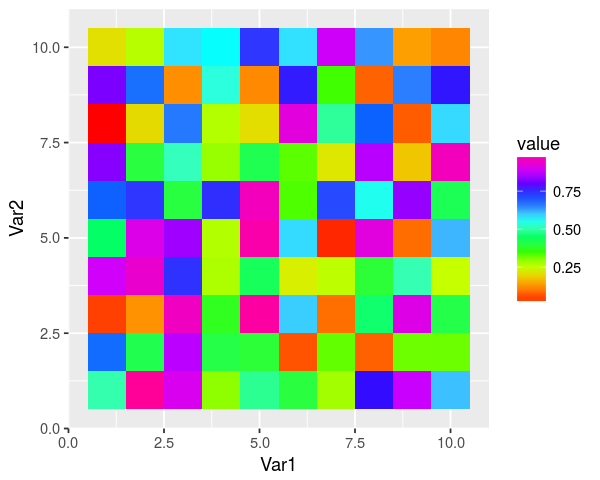

In [92]:
p + scale_fill_gradientn(colours = rainbow(10))

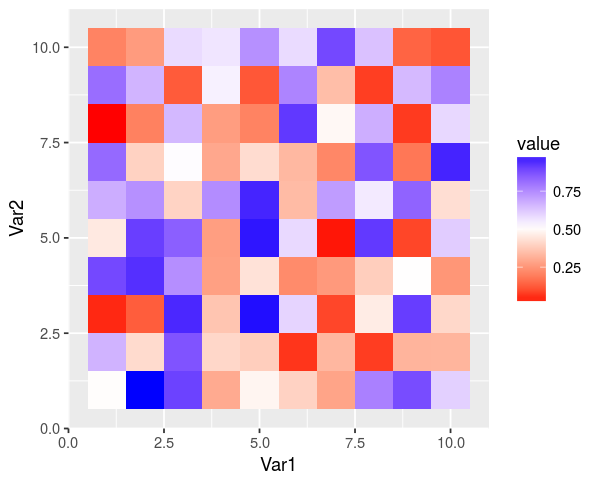

In [93]:
p + scale_fill_gradientn(colours = c("red", "white", "blue"))

### Plotting two dataframes (Girko's circular Law)

According to Girko's circular law, the eigenvalues of a matrix $M$ of size $N \times N$ are approximately contained in a circle in the complex plane with radius $\sqrt{N}$. Let's draw the results of a simulation displaying this result.

First, we need to build a function object that will calculate the ellipse (the perdicted bounds of the eigenvalues): 

In [2]:
build_ellipse <- function(hradius, vradius){ # function that returns an ellipse
  npoints = 250
  a <- seq(0, 2 * pi, length = npoints + 1)
  x <- hradius * cos(a)
  y <- vradius * sin(a)  
  return(data.frame(x = x, y = y))
}

In [3]:
N <- 250 # Assign size of the matrix

M <- matrix(rnorm(N * N), N, N) # Build the matrix

eigvals <- eigen(M)$values # Find the eigenvalues

eigDF <- data.frame("Real" = Re(eigvals), "Imaginary" = Im(eigvals)) # Build a dataframe

my_radius <- sqrt(N) # The radius of the circle is sqrt(N)

ellDF <- build_ellipse(my_radius, my_radius) # Dataframe to plot the ellipse

names(ellDF) <- c("Real", "Imaginary") # rename the columns

Now the plotting:

In [4]:
# plot the eigenvalues
p <- ggplot(eigDF, aes(x = Real, y = Imaginary))
p <- p +
  geom_point(shape = I(3)) +
  theme(legend.position = "none")

# now add the vertical and horizontal line
p <- p + geom_hline(aes(yintercept = 0))
p <- p + geom_vline(aes(xintercept = 0))

# finally, add the ellipse
p <- p + geom_polygon(data = ellDF, aes(x = Real, y = Imaginary, alpha = 1/20, fill = "red"))
p

ERROR: Error in ggplot(eigDF, aes(x = Real, y = Imaginary)): could not find function "ggplot"


#### Exercise

Create a self-sufficient R Script called `Girko.R` that combines all the above commands for plotting the Girko's law simulation, including saving the result figure as a file called `Girko.pdf` in the results directory.

### Annotating plots

In this example, we will use the ggplot `geom` `text` to annotate a plot.

In [97]:
a <- read.table("../data/Results.txt", header = TRUE)

Check what the data look like:

In [98]:
head(a)

x,y1,y2,y3,Label
3.515424,4320,4320,0,NA
3.533984,2160,2160,0,NA
3.557647,4320,4320,0,NA
3.569953,4320,4320,0,NA
3.578984,8640,8640,0,NA
3.585665,2160,2160,0,NA


Warning message:
“Removed 91 rows containing missing values (geom_text).”

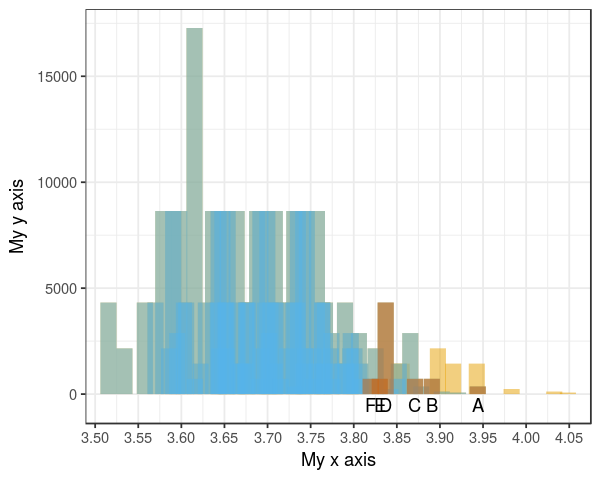

In [99]:
a$ymin <- rep(0, dim(a)[1]) # append a column of zeros

# Print the first linerange
p <- ggplot(a)
p <- p + geom_linerange(data = a, aes(
                          x = x,
                          ymin = ymin,
                          ymax = y1,
                          size = (0.5)
                          ),
                        colour = "#E69F00",
                        alpha = 1/2, show.legend = FALSE)

# Print the second linerange
p <- p + geom_linerange(data = a, aes(
                          x = x,
                          ymin = ymin,
                          ymax = y2,
                          size = (0.5)
                          ),
                        colour = "#56B4E9",
                        alpha = 1/2, show.legend = FALSE)

# Print the third linerange:
p <- p + geom_linerange(data = a, aes(
                          x = x,
                          ymin = ymin,
                          ymax = y3,
                          size = (0.5)
                          ),
                        colour = "#D55E00",
                        alpha = 1/2, show.legend = FALSE)

# Annotate the plot with labels:
p <- p + geom_text(data = a, aes(x = x, y = -500, label = Label))

# now set the axis labels, remove the legend, and prepare for bw printing
p <- p + scale_x_continuous("My x axis",
                            breaks = seq(3, 5, by = 0.05)) + 
                            scale_y_continuous("My y axis") + 
                            theme_bw() + 
                            theme(legend.position = "none") 
p

#### Exercise

Create a self-sufficient R Script called `MyBars.pdf` that combines all the above commands for annotating a plot, including saving the result figure as a file called `MyBars.pdf` in the results directory.

### Mathematical display

Let's try mathematical annotation on a axis, and in the plot area.

First create some linear regression "data":

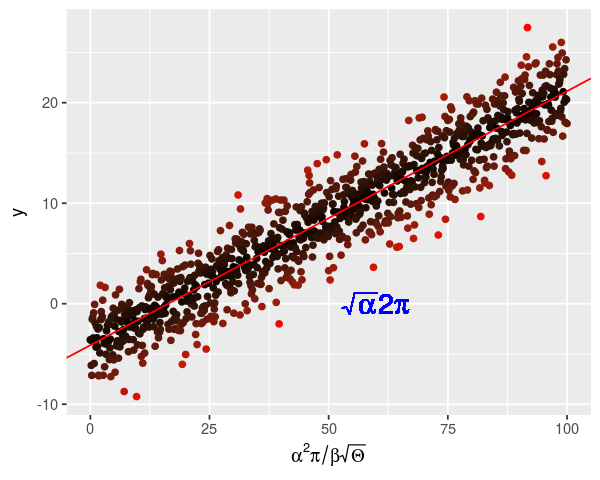

In [100]:
x <- seq(0, 100, by = 0.1)
y <- -4. + 0.25 * x +
  rnorm(length(x), mean = 0., sd = 2.5)

# and put them in a dataframe
my_data <- data.frame(x = x, y = y)

# perform a linear regression
my_lm <- summary(lm(y ~ x, data = my_data))

# plot the data
p <-  ggplot(my_data, aes(x = x, y = y,
                          colour = abs(my_lm$residual))
             ) +
  geom_point() +
  scale_colour_gradient(low = "black", high = "red") +
  theme(legend.position = "none") +
  scale_x_continuous(
    expression(alpha^2 * pi / beta * sqrt(Theta)))

# add the regression line
p <- p + geom_abline(
  intercept = my_lm$coefficients[1][1],
  slope = my_lm$coefficients[2][1],
  colour = "red")
# throw some math on the plot
p <- p + geom_text(aes(x = 60, y = 0,
                       label = "sqrt(alpha) * 2* pi"), 
                       parse = TRUE, size = 6, 
                       colour = "blue")

p

#### Exercise 

Create a self-sufficient R Script called `plotLin.R` that combines all the above commands for annotating a plot, including saving the resulting figure as a file called `MyLinReg.pdf` in the results directory.

### ggthemes

The package `ggthemes` provides you some additional `geom`s, ` scale`s, and `theme`s for `ggplot`. These include a theme based on Tufte's *The Visual Display of Quantitative Information* (see [suggested readings](#Readings-&-Resources)). 

Let's try this package. First install it:

```R
install.packages("ggthemes")
```

Then try:

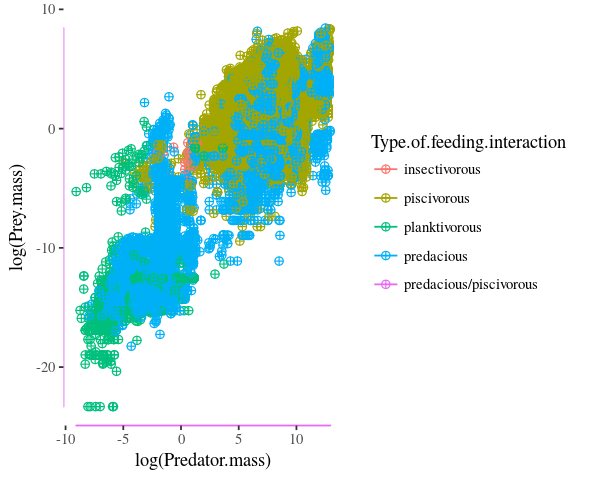

In [101]:
library(ggthemes)

p <- ggplot(MyDF, aes(x = log(Predator.mass), y = log(Prey.mass),
                colour = Type.of.feeding.interaction )) +
                geom_point(size=I(2), shape=I(10)) + theme_bw()

p + geom_rangeframe() + # now fine tune the geom to Tufte's range frame
        theme_tufte() # and theme to Tufte's minimal ink theme    

Go to <https://github.com/jrnold/ggthemes> for more information and a list of `geom`s, `theme`s, and `scale`s.

> **Tip:** *Both `library()` and `require()` are commands/functions to load packages. The difference is that `require()` is designed for use inside other functions, so it returns `FALSE` and gives a warning, whereas`library()` returns an error by default if the package does not exist.*

## Practicals

1. In this practical, you will write script that draws and saves a pdf file of the following figure, and writes the accompanying regression results to a formatted table in csv. Note that as the plot suggests, that the analysis must be subsetted by the `Predator.lifestage` field of the dataset. 

---

<figure>
<img src="./graphics/Figure1.png" alt="xkcd on programming" style="width:60%">
    <small>
        <center>
            <figcaption> 
               Write a script that generates this figure
            </figcaption>
        </center>
    </small>
</figure>

---



**Guidelines**:

* Write a `R` script file called `PP_Regress.R` and save it in the `Code` directory. Sourcing or running this
script should result in one pdf file containing the following figure being saved in the `Results` directory: (Hint: Use the `print()` command to write to the pdf)

* In addition, the script should calculate the regression results corresponding to the lines fitted in the figure and save it to a csv delimited table called (`PP_Regress_Results.csv`), in the `Results` directory. (Hint: you will have to initialize a new dataframe in the script to first store the calculations and then `write.csv()` or `write.table()` it.)

* All that you are being asked for here is results of an analysis of Linear regression on subsets of the data corresponding to available Feeding Type $\times$ Predator life Stage combination — not a multivariate linear model with these two as separate covariates!

* The regression results should include the following with appropriate headers (e.g., slope, intercept, etc, in each Feeding type $\times$ life stage category): regression slope, regression intercept, R$^2$, F-statistic value, and p-value of the overall regression (Hint: Review the Stats week!).

* The script should be self-sufficient and not need any external inputs — it should import the above predator-prey dataset from the appropriate directory, and save the graphic plots to the appropriate directory (Hint: use relative paths). Anybody should be able to `source` it without errors.

* You can also use the `dplyr` function instead of looping (see R Chapter, and the `ggplot` command instead of `qplot`.

2. **Extra Credit**: 

Do the same as above, but the analysis this time should be separate by the dataset's `Location` field. Call it `PP_Regress_loc.R`. No need to generate plots for this (just the analysis results to a `.csv` file), as a combination of `Type.of.feeding.interaction`, `Predator.lifestage`, and ` Location` will be far too busy (faceting by three variables is too much to be meaningful)!

3. **Mapping**: You can do do mapping in R using the `maps` package. In this practical, you will map the Global Population Dynamics Database (GPDD). This is a freely available database that was developed at Silwood. The [Living Planet Index](http://livingplanetindex.org/home/index) is based upon these data.
    *  Use `load()` from `GPDDFiltered.RData` that is available on the TheMulQuaBio git repository &mdash; have a look at the data contents. 
    *  What you need is latitude and longitude information for a bunch of species for which population time series are available in the GPDD
    *  Now use `install.packages()` to install the package `maps`, as you did with `ggplot2`
    *  Now create a script that:	
        * Loads the maps package
        * Loads the GPDD data
        * Creates a world map (use the map function, read its help, also google examples using `maps`
        * Superimposes on the map all the locations from which we have data in the GPDD dataframe
    * Looking at the map, what biases might you expect in any analysis based on the data represented? *include your answer as a comment at the end of your R script*.


## Readings & Resources

Check out `DataDataData!`, `Visualization` and `R`, under `readings` on the TheMulQuaBio repository.

* [Wide vs. long data](http://www.theanalysisfactor.com/wide-and-long-data/)

* [Hadley Wickham's excellent article about "tidy" data](http://vita.had.co.nz/papers/tidy-data.pdf).

* Brian McGill's [Ten commandments for data management](
    https://dynamicecology.wordpress.com/2016/08/22/ten-commandments-for-good-data-management)

* This paper covers similar ground (available in the readings directory): [Borer et al (2009). Some Simple Guidelines for Effective Data Management. Bulletin of the Ecological Society of America, 90(2), 205-214.](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/0012-9623-90.2.205)

* [Wrangler](http://vis.stanford.edu/papers/wrangler)

* [An interactive framework for data cleaning](https://www2.eecs.berkeley.edu/Pubs/TechRpts/2000/CSD-00-1110.pdf)

* [Rolandi et al. "A Brief Guide to Designing Effective Figures for the Scientific Paper", doi:10.1002/adma.201102518](https://onlinelibrary.wiley.com/doi/pdf/10.1002/adma.201102518?casa_token=48b0PGtaUiYAAAAA:DQ9bHugikOkHDkf4uLTYIq74negyWefZjAbexYcgYObHn0sks2Q8ulvHcTUWxteqwTb5qAa0IV71Mg)

* The classic [Tufte](https://www.edwardtufte.com/tufte/books_vdqi); Available in the Imperial College Central Library. I have also added extracts and a related book in pdf on the git repository. BTW, check out what Tufte thinks of [PowerPoint](https://www.edwardtufte.com/tufte/powerpoint).

* [Tufte in R](http://motioninsocial.com/tufte)

* [Ten Simple Rules for Better Figures](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)